# Project 1 - Bank marketing Analytics


### 1. Problem statement

The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
   - bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
   - bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   
The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

The classification goal is to predict if the client will subscribe a term deposit (variable y).

   Input variables:
   
#### Bank client data:<br>
   
   - ***age:*** (numeric)<br>
   - ***job:*** type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")<br> 
   - ***marital:*** marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
   - ***education:*** (categorical: "unknown","secondary","primary","tertiary")<br>
   - ***default:*** has credit in default? (binary: "yes","no")<br>
   - ***balance:*** average yearly balance, in euros (numeric)<br> 
   - ***housing:*** has housing loan? (binary: "yes","no")<br>
   - ***loan:*** has personal loan? (binary: "yes","no")<br>
   
#### Related with the last contact of the current campaign:<br>
   
   - ***contact:*** contact communication type (categorical: "unknown","telephone","cellular")<br> 
   - ***day:*** last contact day of the month (numeric)<br>
   - ***month:*** last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
   - ***duration:*** last contact duration, in seconds (numeric)<br>
   
#### Other attributes:<br>
  
   - ***campaign:*** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
   - ***pdays:*** number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
   - ***previous:*** number of contacts performed before this campaign and for this client (numeric)<br>
   - ***poutcome:*** outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

#### Output variable (desired target):<br>
  
   - ***y*** - has the client subscribed a term deposit? (binary: "yes","no")<br>
   
   
#### ***Business goals:***

To make marketing campaigns more effective to target the right customers.

***What is a Term Deposit?***
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. 

***Approach:***

- Firstly by identifying the customer segments using client data who subscribed to term deposit.
- Secondly predicting the results of the marketing campaign for each customer and identifying the factors which may affect the campaign results. This helps to classify the profile of a customer, who is more likely to acquire the term deposit and develop more targeted marketing campaigns.


***Business goals***:

* To make marketing campaigns more effective to target the right customers. 

***Approach***: 
* Firstly by identifying the customer segments using client data who subscribed to term deposit.
* Secondly predicting the results of the marketing campaign for each customer and identifying the factors which may affect the campaign results.
This helps to classify the profile of a customer, who is more likely to acquire the term deposit and develop more targeted marketing campaigns. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#root="/content/drive/MyDrive/Internship/Bank Marketing Analytics/" # to specify the current folder

root="/content/drive/MyDrive/"
### 1. mount drive
### 2. Create folder in drive Internship/Bank Marketing Analytics
### 3. Upload files into that folder
  

In [5]:
import os
os.chdir(root)

In [6]:
os.getcwd()

'/content/drive/MyDrive'

### 2. Load library and import data

In [7]:
#Import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#for some statistics
from scipy.stats import norm, skew 

#Import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Color
sns.set_palette("Paired",7)

#plt.style.use('dark_background')

#Import machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost


#tools for hyperparameters search
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV 


In [8]:
Train_df = pd.read_csv("/content/drive/MyDrive/bank-full.csv",sep = ";")
Test_df = pd.read_csv("/content/drive/MyDrive/bank.csv", sep = ";")
#Train_df = pd.read_csv("/content/drive/MyDrive/Internship/Bank Marketing Analytics/bank-full.csv",sep = ";")
#Test_df = pd.read_csv("/content/drive/MyDrive/Internship/Bank Marketing Analytics/bank.csv", sep = ";")

In [9]:
# Top 5 rows of the Train dataset
Train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
# Top 5 rows of the Test dataset
Test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 3. Inspect the data

In [11]:
# Shape (No.of rows and columns of Train dataset)
print('Shape:',Train_df.shape[0],'rows x', Train_df.shape[1],'columns')

Shape: 45211 rows x 17 columns


In [12]:
# Shape (No.of rows and columns of Test dataset)
print('Shape:',Test_df.shape[0],'rows x', Test_df.shape[1],'columns')

Shape: 4521 rows x 17 columns


In [13]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### 4. Preprocessing / Data Wrangling

#### 4.1 Checking for Duplicate Values

In [15]:
# Identifying duplicate values 
print('DUPLICATES\nTrain:\t',Train_df.duplicated().sum(),
      '\nTest:\t', Test_df.duplicated().sum())

DUPLICATES
Train:	 0 
Test:	 0


##### 4.2 Five Point Summary

In [16]:
print('Train:')
display(Train_df.describe().T) 

print('\n')
print('Test:')
display(Test_df.describe().T)


Train:


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0




Test:


,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [17]:
# Getting unique counts of all Nominal Variables

for column in Train_df[['job','marital','education','default','housing', 'loan', 'contact', 'month', 'poutcome']]:
    print('\n')
    print(column.upper(),': ',Train_df[column].nunique())
    print(Train_df[column].value_counts().sort_values())



JOB :  12
unknown           288
student           938
housemaid        1240
unemployed       1303
entrepreneur     1487
self-employed    1579
retired          2264
services         4154
admin.           5171
technician       7597
management       9458
blue-collar      9732
Name: job, dtype: int64


MARITAL :  3
divorced     5207
single      12790
married     27214
Name: marital, dtype: int64


EDUCATION :  4
unknown       1857
primary       6851
tertiary     13301
secondary    23202
Name: education, dtype: int64


DEFAULT :  2
yes      815
no     44396
Name: default, dtype: int64


HOUSING :  2
no     20081
yes    25130
Name: housing, dtype: int64


LOAN :  2
yes     7244
no     37967
Name: loan, dtype: int64


CONTACT :  3
telephone     2906
unknown      13020
cellular     29285
Name: contact, dtype: int64


MONTH :  12
dec      214
mar      477
sep      579
oct      738
jan     1403
feb     2649
apr     2932
nov     3970
jun     5341
aug     6247
jul     6895
may    13766
Name: mon

### 5. Exploratory Data Analysis (EDA)

#### 5.1  Univariate Analysis:
Univariate analysis refers to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.

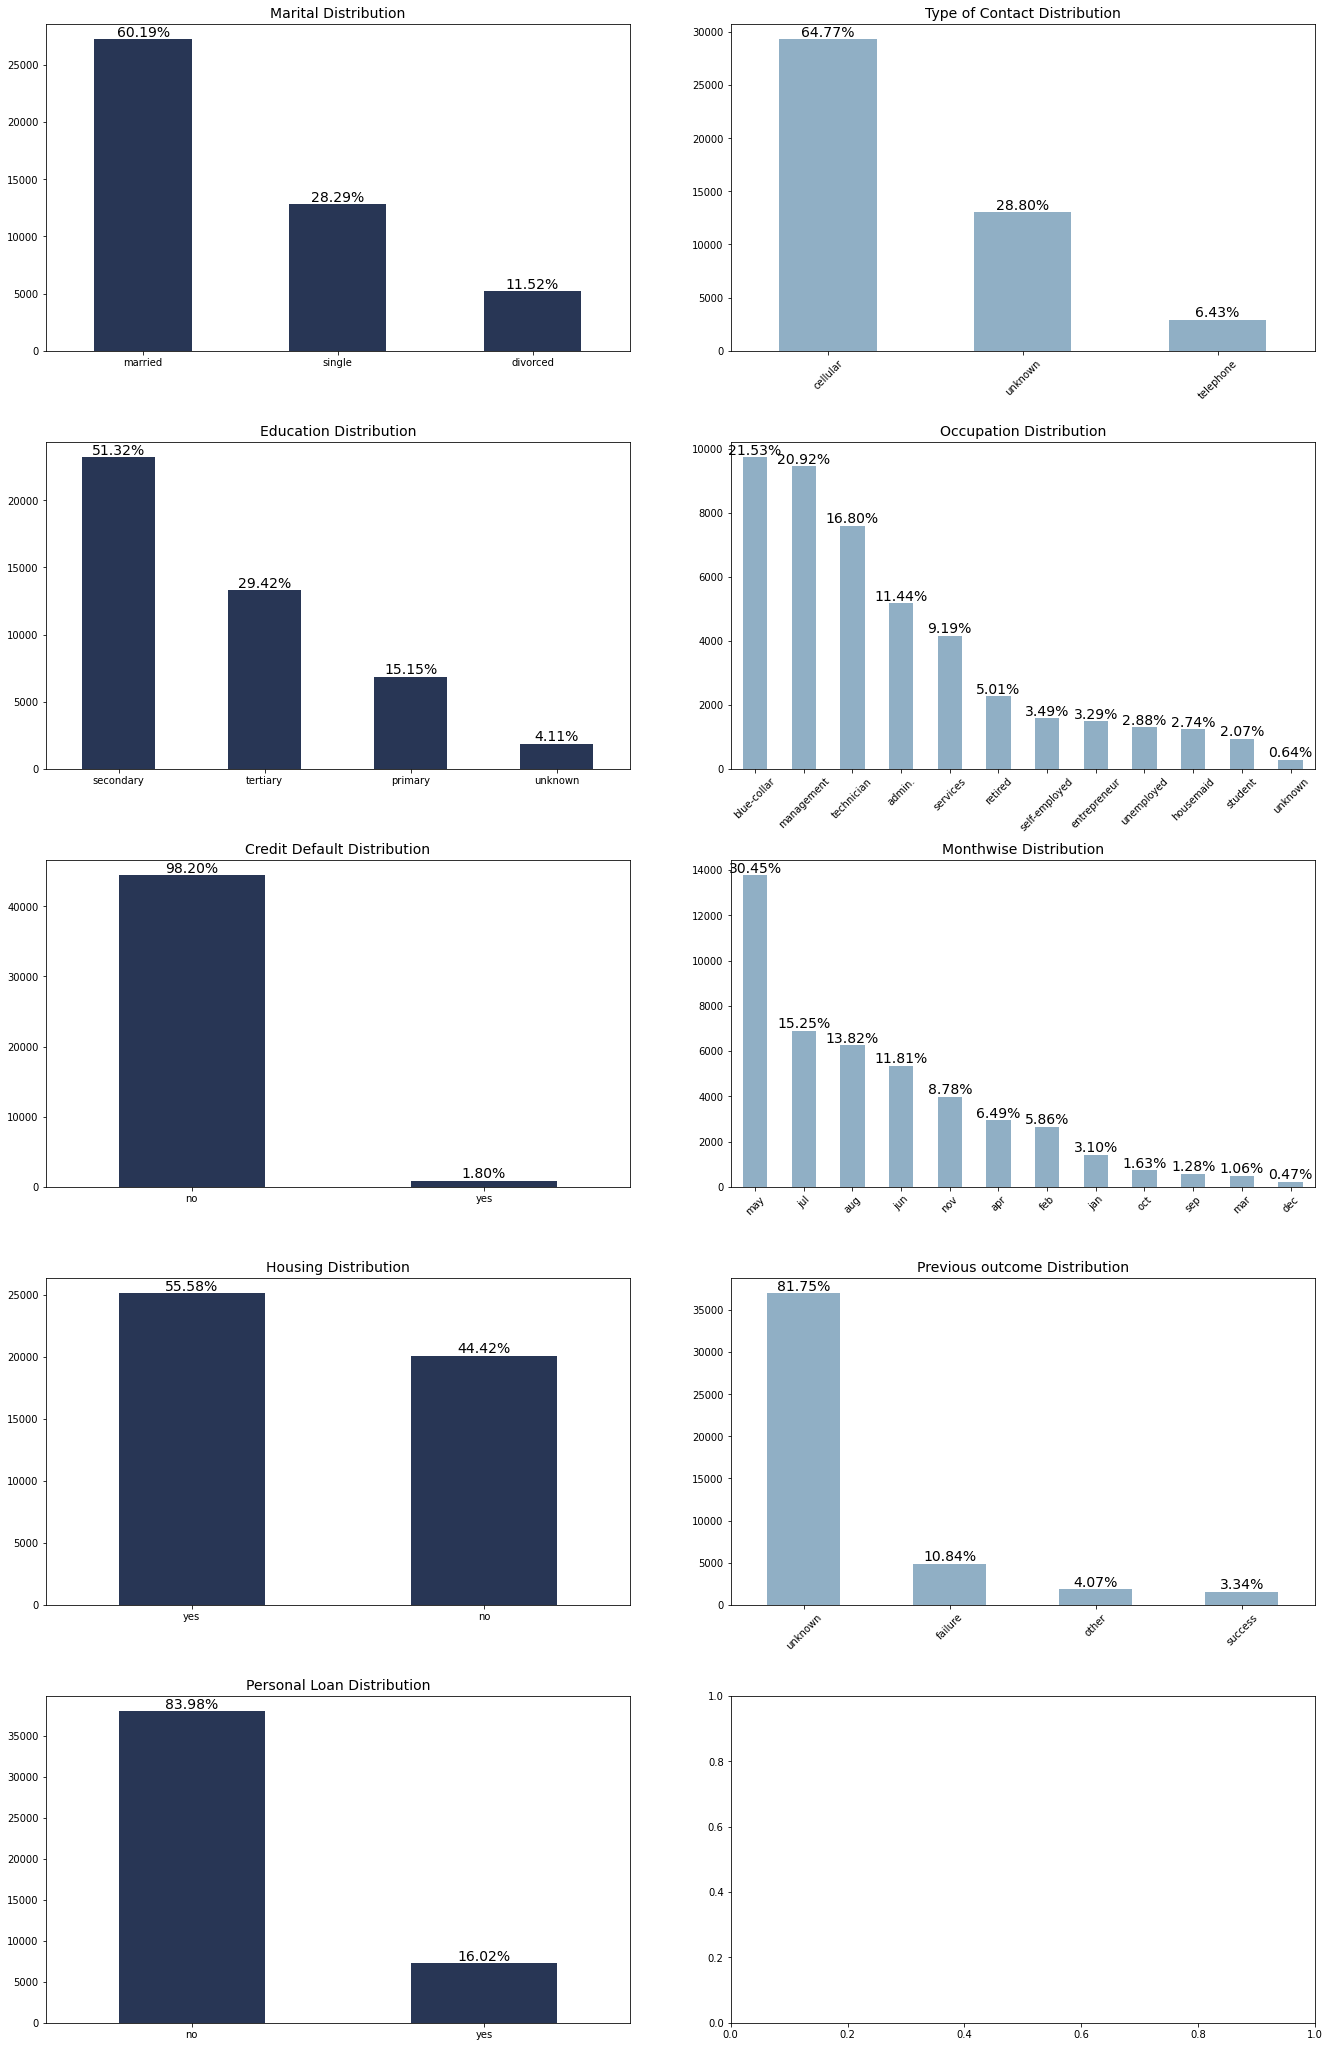

In [18]:
# Distribution of categorical variables:


cat = ['marital','education','default','housing', 'loan', 'contact', 'job', 'month', 'poutcome']


title = ['Marital Distribution', 'Education Distribution', 'Credit Default Distribution','Housing Distribution', 
         'Personal Loan Distribution','Type of Contact Distribution', 'Occupation Distribution', 'Monthwise Distribution', 'Previous outcome Distribution']

fig, axes = plt.subplots(nrows = 5,ncols = 2, figsize = (20,30))
fig.tight_layout(pad=7.0)


for i, item in enumerate(cat):
    if i < 5:
        ax = Train_df[item].value_counts().plot(kind = 'bar',ax=axes[i,0], rot = 0, color ='#283655')
        total=Train_df[item].count()
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}%'.format(100 * p.get_height()/total),
                    fontsize=14, color='black', ha='center', va='bottom')
        
               
    elif i >=5 and i < 9:
        ax = Train_df[item].value_counts().plot(kind = 'bar',ax=axes[i-5,1], rot = 45,color ='#90afc5')
        total=Train_df[item].count()
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}%'.format(100 * p.get_height()/total),
                    fontsize=14, color='black', ha='center', va='bottom')
               
#Title
for i, item in enumerate(title):
    if i < 5:
        ax = axes[i,0]
        ax.set_title(item, fontsize=14)
          
    elif i >=5 and i < 9:
        ax = axes[i-5,1]
        ax.set_title(item, fontsize=14)

### Inference:

- ***marital*** 60.19% Customers who are married are contacted more by the bank. Very few i.e. 11.52% customers who are divorced are contacted by the bank. 
- ***education*** 51.32% Customers are contacted by the bank with Secondary educational qualification, are more than the people with any other educational qualification. There are few 4.11% customers whose educational information is not known. Bank has not contacted illiterate people.
- ***default*** 98.2% Customers with Credit default status as ‘no’ are the most who have been contacted by the bank for the deposits. Customers with default status ‘yes’ have been less frequently contacted by the bank .
- ***housing*** Customers with housing loan are the most ones who have been contacted by the bank followed by customers with no housing loan.
- ***loan*** Customers with no personal loan are the most ones who have been contacted by the bank for the deposits. Very few people with personal loan are contacted by the bank for the deposits.
- ***month*** Customers have been contacted more in the month of May, followed by July, August, June. Very few customers have been contacted in the month of December.
- ***poutcome*** From the above plot it is evident that majority of the outcome of the previous campaign is unknown. Very few customers from previous marketing strategy have subscribed for the deposits.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

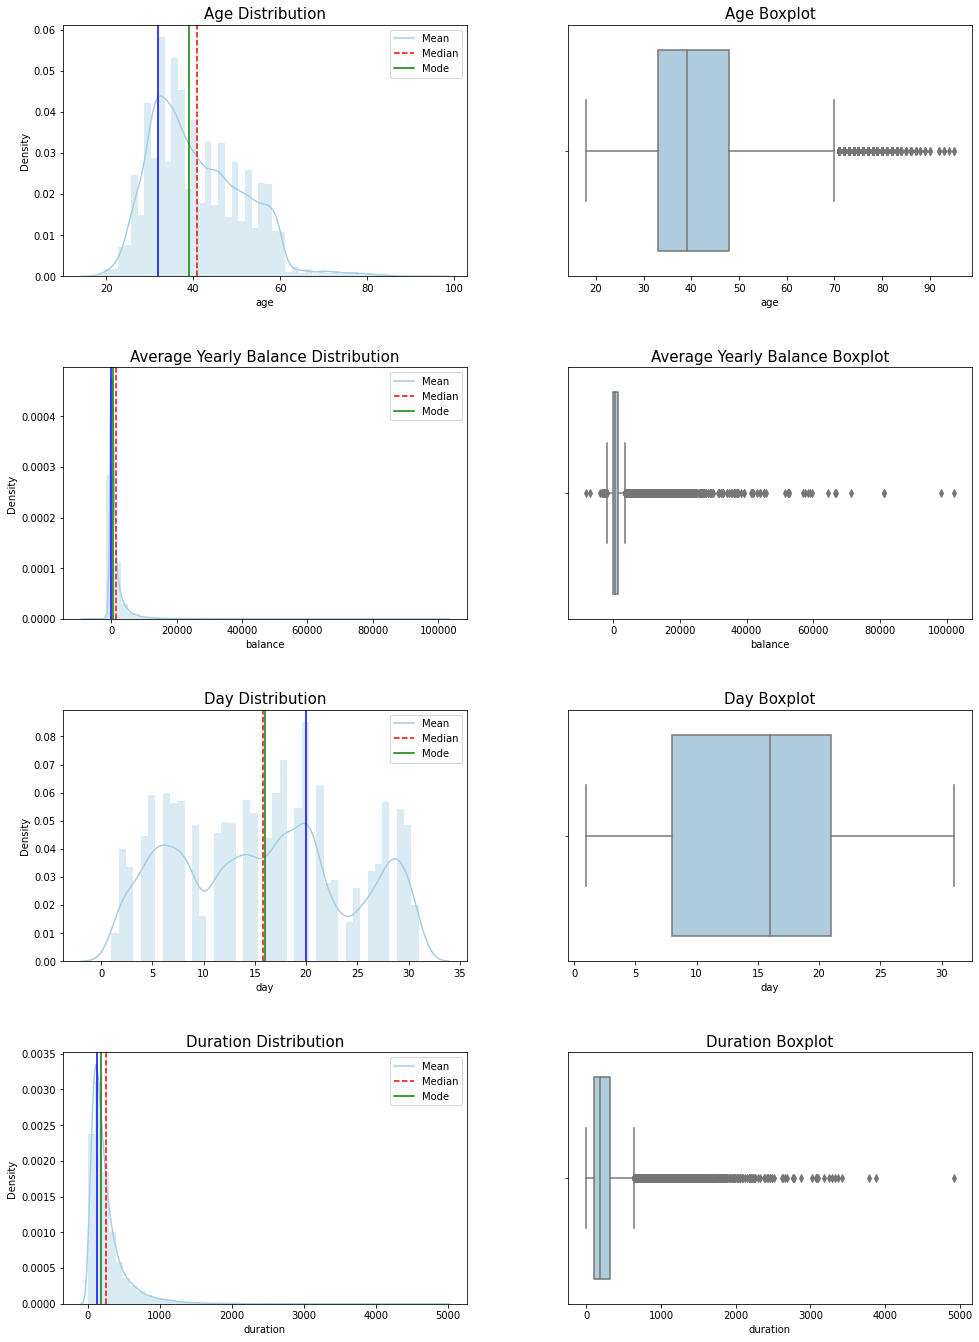

In [19]:
## Univariate analysis for first 4 columns

num = ['age', 'balance', 'day','duration']

title = ['Age Distribution', 'Average Yearly Balance Distribution', 'Day Distribution',
         'Duration Distribution', 'Age Boxplot','Average Yearly Balance Boxplot','Day Boxplot','Duration Boxplot']

fig, axes = plt.subplots(nrows = 4,ncols = 2, figsize = (15,20))
fig.tight_layout(pad=7.0)

for i, item in enumerate(num):
    if i < 4:
        mean=Train_df[item].mean()
        median=Train_df[item].median()
        mode=Train_df[item].mode().array[0]

        a = sns.distplot(Train_df[item], ax=axes[i,0])
        a = sns.boxplot(Train_df[item], ax=axes[i,1])

        axes[i,0].axvline(mean, color='r', linestyle='--')
        axes[i,0].axvline(median, color='g', linestyle='-')
        axes[i,0].axvline(mode, color='b', linestyle='-')
        axes[i,0].legend({'Mean':mean,'Median':median,'Mode':mode})


#Title    
for i, item in enumerate(title):
    if i < 4:
        ax = axes[i,0]
        ax.set_title(item, fontsize=15)
            
    elif i >=4 and i < 9:
        ax = axes[i-4,1]
        ax.set_title(item, fontsize=15)

### Inference:
- For Age attribute max density of the data lies in the range of 20–60 years and very few customers are aged 20 years or below or 60 years and above.
- Any duration of call more than 1000 are considered as outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

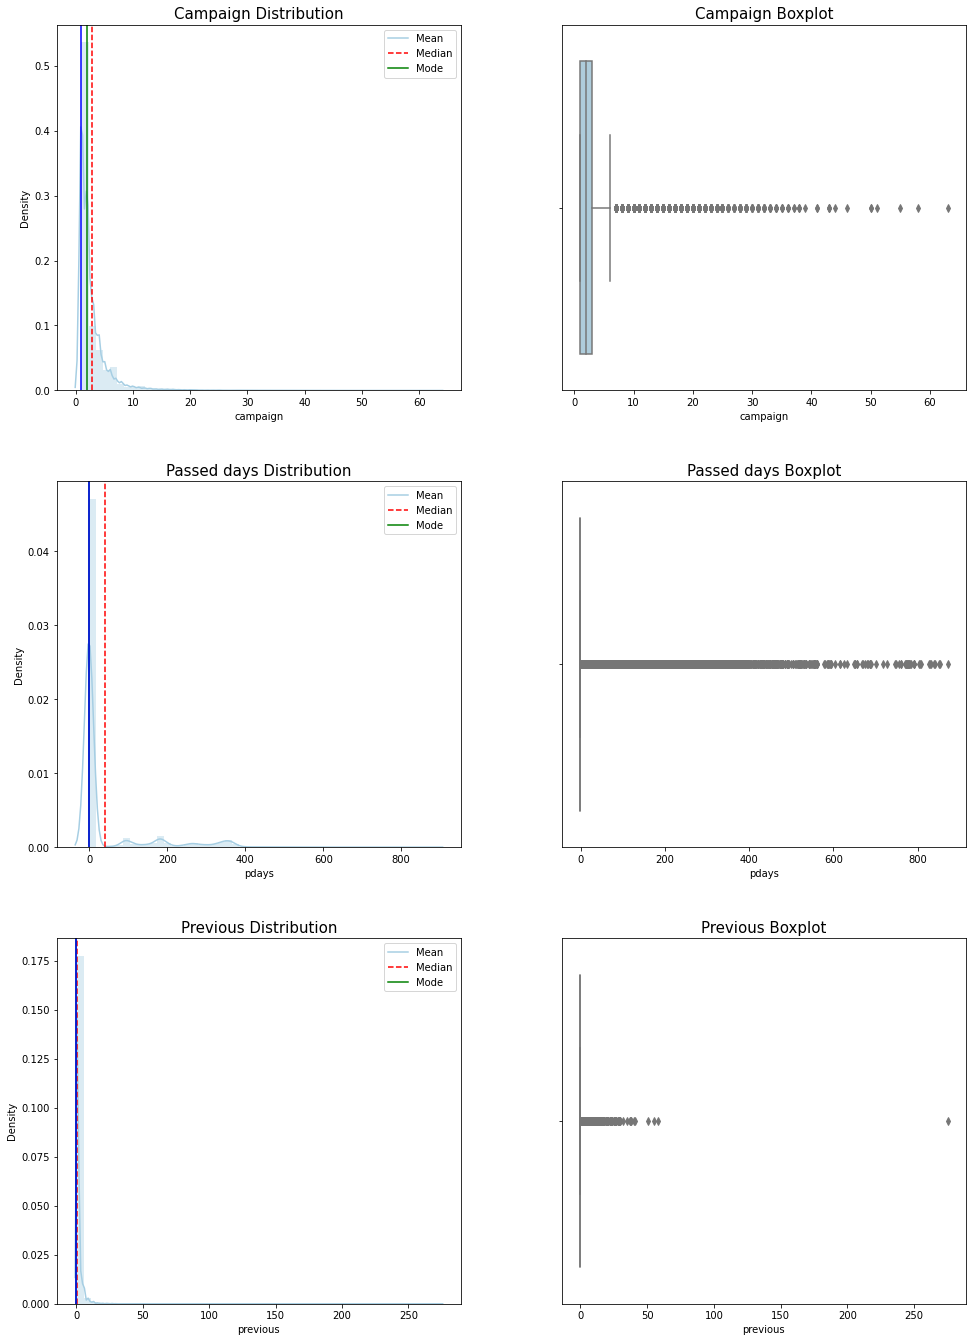

In [20]:
## Univariate analysis for next 3 numerical columns

num = [ 'campaign', 'pdays', 'previous']

title = ['Campaign Distribution', 'Passed days Distribution', 'Previous Distribution',
         'Campaign Boxplot','Passed days Boxplot','Previous Boxplot']

fig, axes = plt.subplots(nrows = 3,ncols = 2, figsize = (15,20))
fig.tight_layout(pad=7.0)

for i, item in enumerate(num):
    if i < 3:
        mean=Train_df[item].mean()
        median=Train_df[item].median()
        mode=Train_df[item].mode().array[0]

        a = sns.distplot(Train_df[item], ax=axes[i,0])
        a = sns.boxplot(Train_df[item], ax=axes[i,1])

        axes[i,0].axvline(mean, color='r', linestyle='--')
        axes[i,0].axvline(median, color='g', linestyle='-')
        axes[i,0].axvline(mode, color='b', linestyle='-')
        axes[i,0].legend({'Mean':mean,'Median':median,'Mode':mode})
                       
for i, item in enumerate(title):
            if i < 3:
                ax = axes[i,0]
                ax.set_title(item, fontsize=15)
            
            elif i >=3 and i < 6:
                ax = axes[i-3,1]
                ax.set_title(item, fontsize=15)

### Inference: 

- We can see from the above boxplot that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). Probably there would be incorrect values (noisy data), so we need to identify the data and decide how to manage the outliers.
- 'campaign' holds the number of contacts performed during this campaign and for this customer (numeric, includes last contact) Numbers for 'campaign' above 20 are clearly noise, so I suggest to impute them with average campaign values while data cleaning.
- Previous holds the number of contacts performed before this campaign and for this customer (numeric).'previous'with greater than 4 are outliers. Previous with number zero might be helpful in predicting whether customer will or will not subscribe for deposits.
- 'pdays' holds the number of days that passed by after the customer was last contacted from a previous campaign Looking closer into 'pdays' data we can see that more than 75% of data values of the column are -1. -1 possibly means that the customer wasn't contacted before or stands for missing data. Hence we suggest to drop this column.

In [21]:
numeric_feats = Train_df.dtypes[Train_df.dtypes != "object"].index

# Check the skeweness of all numerical features
skewed_feats = Train_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkeweness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skeweness in numerical features: 



,Skew
previous,41.845066
balance,8.360031
campaign,4.898488
duration,3.144214
pdays,2.615629
age,0.684795
day,0.093076


### Inference: 

The output above shows that all the variables has a right-skewed distribution with the skewness values of (41.84, 8.36, 4.89, 3.14, 2.61, 0.68 & 0.09 resp.) Ideally, the skewness value should be between -1 and 1. There are many techniques of handling these extreme values, one of which is quantile-based capping or flooring.

In [22]:
#Converting Age to categorical column for Train data (Grouping the data according to years.)
def age_lab(Train_df) :
    
    if Train_df["age"] <= 20 :
        return "age_0-20"
    elif (Train_df["age"] > 20) & (Train_df["age"] <= 30 ):
        return "age_20-30"
    elif (Train_df["age"] > 30) & (Train_df["age"] <= 40) :
        return "age_30-40"
    elif (Train_df["age"] > 40) & (Train_df["age"] <= 50) :
        return "age_40-50"
    elif (Train_df["age"] > 50) & (Train_df["age"] <= 60) :
        return "age_50-60"
    elif (Train_df["age"] > 60) & (Train_df["age"] <= 70) :
        return "age_60-70"
    elif (Train_df["age"] > 70) & (Train_df["age"] <= 80) :
        return "age_70-80"
    elif Train_df["age"] > 80 :
        return "age_gt_80"
Train_df["age_group"] = Train_df.apply(lambda Train_df:age_lab(Train_df), axis = 1)

# remove the age variables and check the train data for the 10 rows 

Train_df = Train_df.drop(['age'], axis=1)

#Converting Age to categorical column for Test data
def age_lab(Test_df) :
    
    if Test_df["age"] <= 20 :
        return "age_0-20"
    elif (Test_df["age"] > 20) & (Test_df["age"] <= 30 ):
        return "age_20-30"
    elif (Test_df["age"] > 30) & (Test_df["age"] <= 40) :
        return "age_30-40"
    elif (Test_df["age"] > 40) & (Test_df["age"] <= 50) :
        return "age_40-50"
    elif (Test_df["age"] > 50) & (Test_df["age"] <= 60) :
        return "age_50-60"
    elif (Test_df["age"] > 60) & (Test_df["age"] <= 70) :
        return "age_60-70"
    elif (Test_df["age"] > 70) & (Test_df["age"] <= 80) :
        return "age_70-80"
    elif Test_df["age"] > 80 :
        return "age_gt_80"
Test_df["age_group"] = Test_df.apply(lambda Test_df:age_lab(Test_df), axis = 1)

# remove the age variables and check the Test data for the 10 rows 

Test_df = Test_df.drop(['age'], axis=1)

Train_df.head(10)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,age_50-60
1,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,age_40-50
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,age_30-40
3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,age_40-50
4,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,age_30-40
5,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,age_30-40
6,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,age_20-30
7,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,age_40-50
8,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,age_50-60
9,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,age_40-50


In [23]:
Test_df.to_pickle("/content/drive/MyDrive/test.pkl") #to preserve changes made to cols
Train_df.to_pickle("/content/drive/MyDrive/train.pkl")

#Test_df.to_pickle("/content/drive/MyDrive/Internship/Bank Marketing Analytics/test.pkl") #to preserve changes made to cols
#Train_df.to_pickle("/content/drive/MyDrive/Internship/Bank Marketing Analytics/train.pkl")

In [24]:
train=pd.read_pickle("/content/drive/MyDrive/train.pkl") # reading from pickle file
test=pd.read_pickle("/content/drive/MyDrive/test.pkl")

#train=pd.read_pickle("/content/drive/MyDrive/Internship/Bank Marketing Analytics/train.pkl") # reading from pickle file
#test=pd.read_pickle("/content/drive/MyDrive/Internship/Bank Marketing Analytics/test.pkl")#

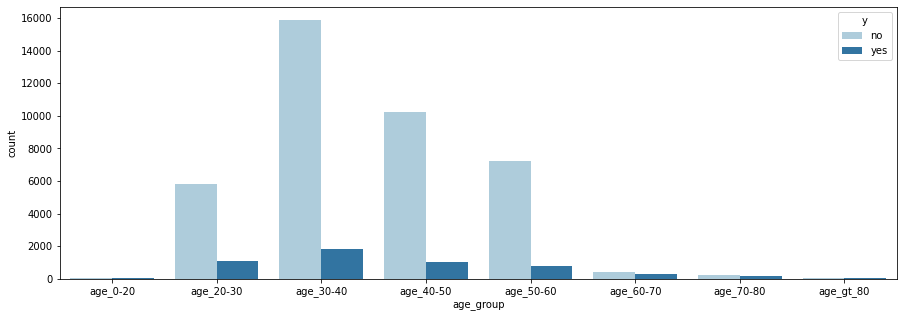

In [25]:
# Subscribed Vs Age

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x='age_group', 
                   order=['age_0-20','age_20-30','age_30-40','age_40-50','age_50-60','age_60-70','age_70-80','age_gt_80'], 
                   hue='y', data=Train_df)

### Inference:
More than 75% of customers who subscribed to term deposit belongs to mid age group(30-40) followed by (20-30) and (40-60).

#### 5.2 Multivariate analysis:

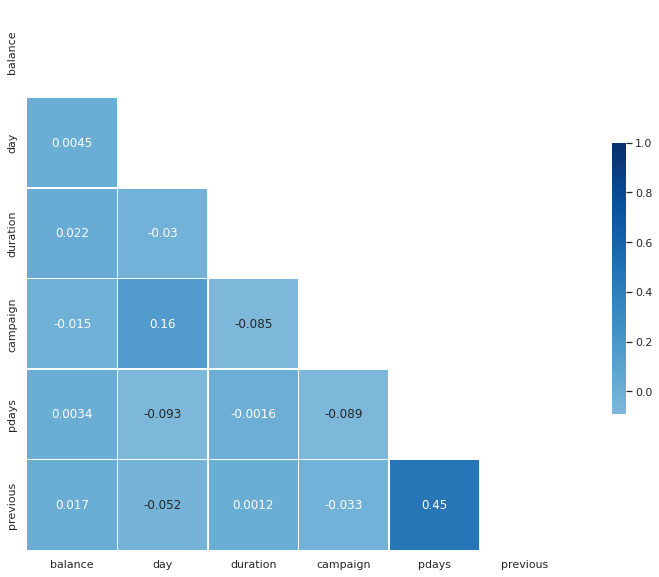

In [27]:
#Set and compute the Correlation Matrix:

corr = Train_df[['balance', 'day','duration', 'campaign', 'pdays', 'previous']].corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.color_palette("Blues", as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


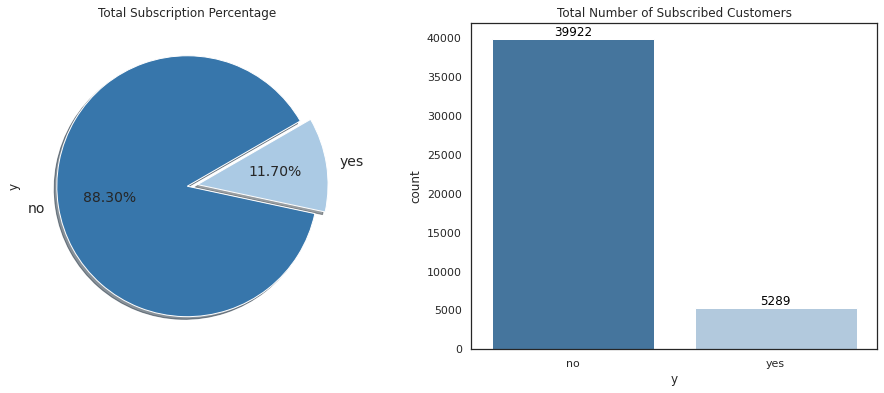

In [28]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

#Pie Plot
Train_df['y'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=['#3776ab','#abcae4'])

ax[0].set_title('Total Subscription Percentage')

#Count Plot
sns.countplot('y', data=Train_df, ax=ax[1], palette=['#3776ab','#abcae4'])
ax[1].set_title('Total Number of Subscribed Customers')

#Iterate through the list of axes' patches
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

### Inference:
Overall Subscribed Customers: A preliminary look at the overall subscribed rate shows that around 88.3% of the customers are not active. As shown in the chart above, this is an imbalanced classification problem. Machine learning algorithms work well when the number of instances of each class is roughly equal. Since the dataset is skewed, we need to keep that in mind while choosing the metrics for model selection.

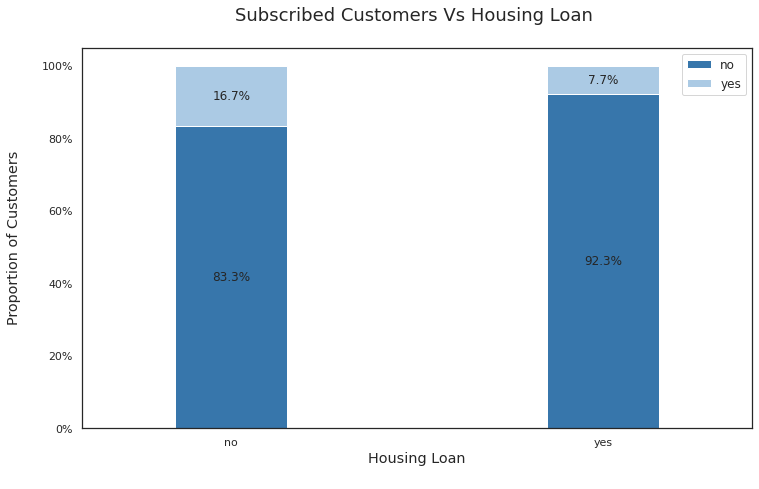

In [29]:
#Subscribe Rate by Housing Loan:

import matplotlib.ticker as mtick

housing_y = Train_df.groupby(['housing','y']).size().unstack()
housing_y.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#3776ab','#abcae4']

ax = (housing_y.T*100.0 / housing_y.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

plt.xlabel('Housing Loan\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

plt.title('Subscribed Customers Vs Housing Loan \n',horizontalalignment="center", 
          fontstyle = "normal", fontsize = "18", 
          fontfamily = "sans-serif")

plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)
    

### Inference:
From the above plot we can see that customers who have not taken a housing loan are more likely to subscribe for the term deposit i.e.16.7% customers comparitive to 7.7%.

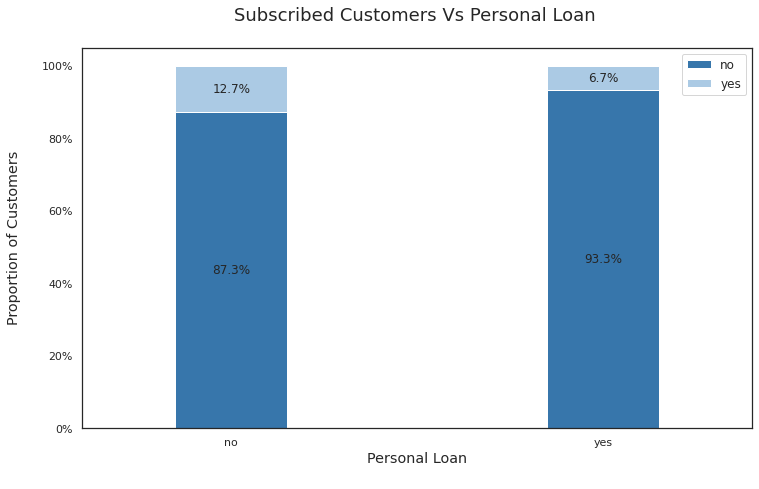

In [30]:
#Subscribe Rate by Personal Loan:

import matplotlib.ticker as mtick

personal_y = Train_df.groupby(['loan','y']).size().unstack()
personal_y.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#3776ab','#abcae4']

ax = (personal_y.T*100.0 / personal_y.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

plt.xlabel('Personal Loan\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

plt.title('Subscribed Customers Vs Personal Loan \n',horizontalalignment="center", 
          fontstyle = "normal", fontsize = "18", 
          fontfamily = "sans-serif")

plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)
    

### Inference:
From the above plot we can see that customers who have not taken a Personal loan are more likely to subscribe for the term deposit i.e.12.7% customers comparitive to 6.7%.

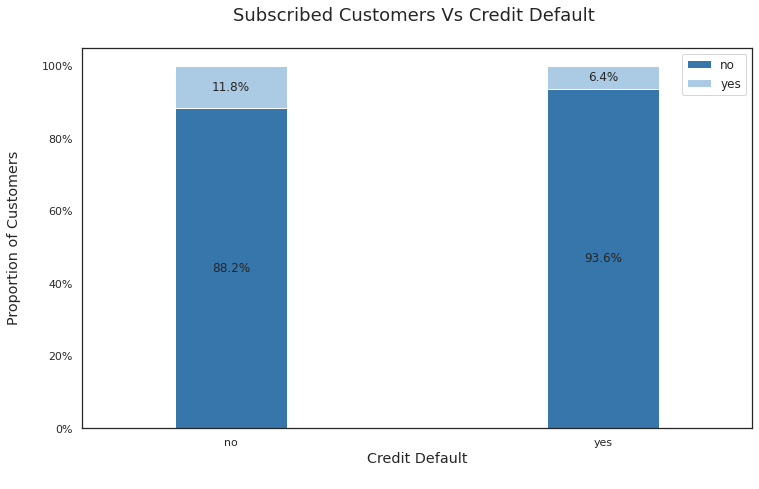

In [31]:
#Subscriber Vs Credit default:

import matplotlib.ticker as mtick

creditDefault_y = Train_df.groupby(['default','y']).size().unstack()
creditDefault_y.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#3776ab','#abcae4']

ax = (creditDefault_y.T*100.0 / creditDefault_y.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

plt.xlabel('Credit Default\n',horizontalalignment="center",
           fontstyle = "normal", fontsize = "large", 
           fontfamily = "sans-serif")

plt.title('Subscribed Customers Vs Credit Default \n',horizontalalignment="center", 
          fontstyle = "normal", fontsize = "18", 
          fontfamily = "sans-serif")

plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)
    

### Inference:
From the above plot we can see that customers who have a Credit default are less likely to subscribe for the term deposit i.e.6.4% of customers comparitive to 11.8%.

#### 5.3 Bivariate Analysis:

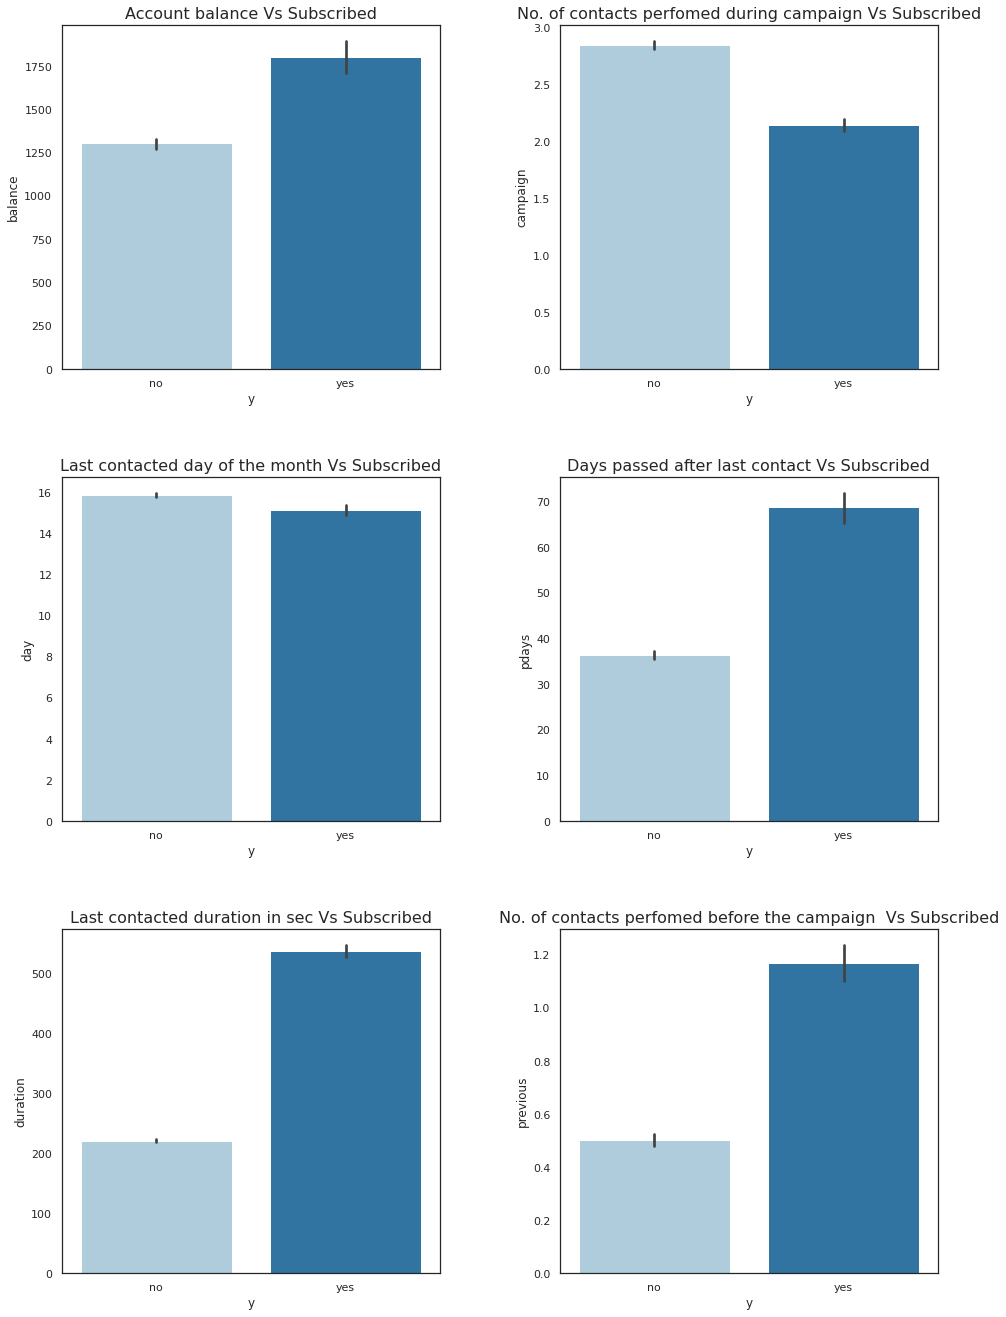

In [32]:
# Analysis of Numerical variables Vs Subscribed Customers:


num = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']


title = ['Account balance Vs Subscribed', 'Last contacted day of the month Vs Subscribed', 'Last contacted duration in sec Vs Subscribed',
         'No. of contacts perfomed during campaign Vs Subscribed', 'Days passed after last contact Vs Subscribed','No. of contacts perfomed before the campaign  Vs Subscribed']

fig, axes = plt.subplots(nrows = 3,ncols = 2, figsize = (15,20))
fig.tight_layout(pad=7.0)


for i, item in enumerate(num):
    if i < 3:
        ax = sns.barplot(x='y', y=Train_df[item], data=Train_df, ax=axes[i,0], palette="Paired")                  
               
    elif i >=3 and i < 6:
        ax = sns.barplot(x='y', y=Train_df[item], data=Train_df, ax=axes[i-3,1], palette="Paired")
               
for i, item in enumerate(title):
            if i < 3:
                ax = axes[i,0]
                ax.set_title(item, fontsize=16)
            
            elif i >=3 and i < 6:
                ax = axes[i-3,1]
                ax.set_title(item,fontsize=16)

### Inference: 

Subscribed Customer Profile:

For better understanding we wanted to compare these important numerical variables from costumers who subscribed and costumers who did not subscribed.

Customer that subscribed for term deposit are those who -

- Tend to have large account balance.
- Were engaged for a very long duration during the recent contact.
- Were contacted more number of times before the campaign.
- Were contacted less number of times during the campaign.

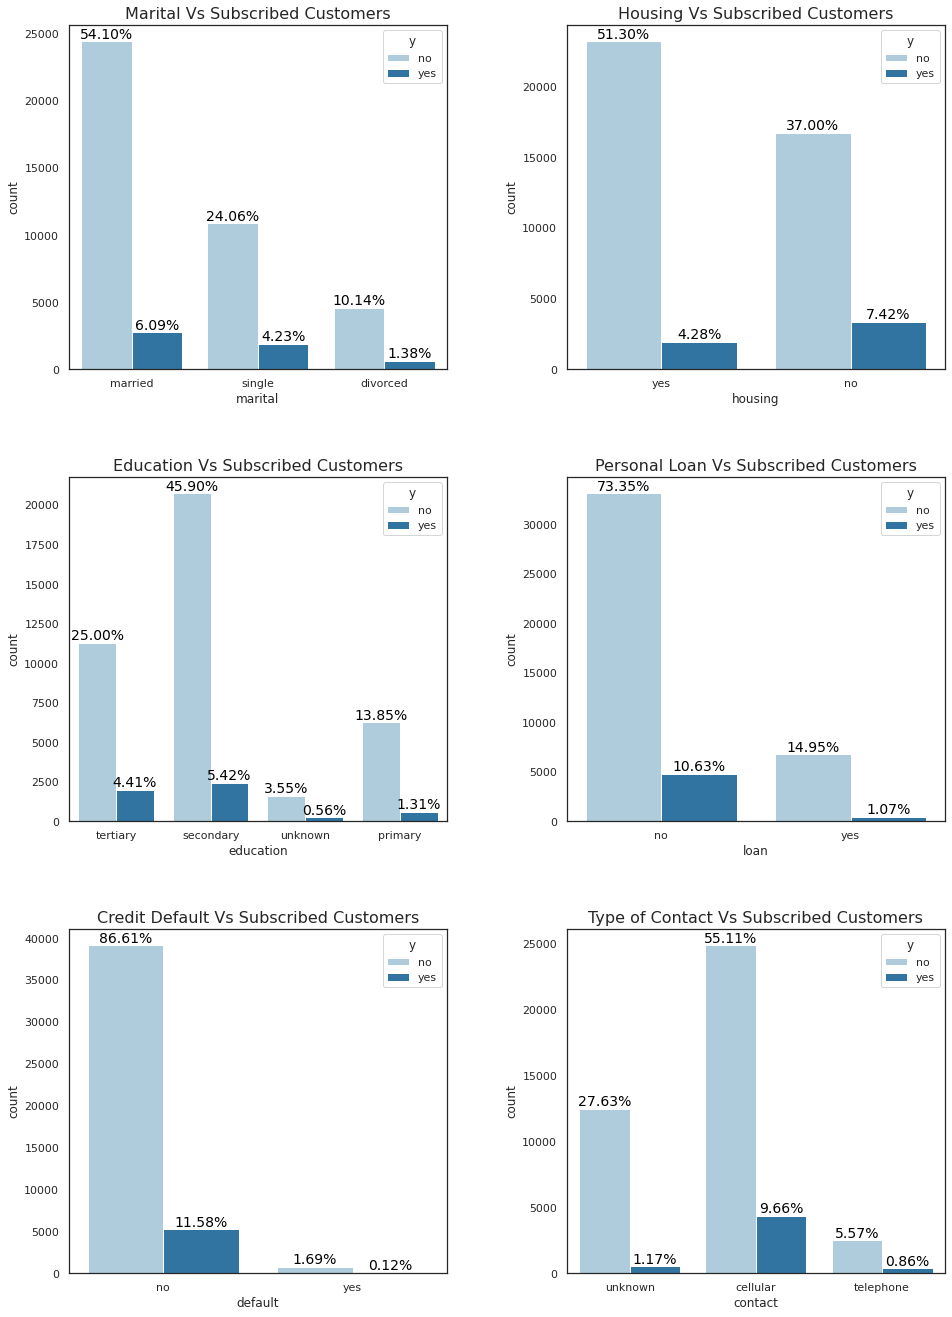

In [33]:
# Relationn of categorical variables Vs Subscribed Customers:


cat = ['marital','education','default','housing', 'loan', 'contact']


title = ['Marital Vs Subscribed Customers', 'Education Vs Subscribed Customers', 'Credit Default Vs Subscribed Customers',
         'Housing Vs Subscribed Customers', 'Personal Loan Vs Subscribed Customers','Type of Contact Vs Subscribed Customers']

fig, axes = plt.subplots(nrows = 3,ncols = 2, figsize = (15,20))
fig.tight_layout(pad=7.0)


for i, item in enumerate(cat):
    if i < 3:
        ax = sns.countplot(x=Train_df[item], hue="y", data=Train_df, ax=axes[i,0], palette="Paired")
        total=Train_df[item].count()
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}%'.format(100 * p.get_height()/total),
                    fontsize=14, color='black', ha='center', va='bottom')
        
                     
    elif i >=3 and i < 6:
        ax = sns.countplot(x=Train_df[item], hue="y", data=Train_df,ax=axes[i-3,1], palette="Paired")
        total=Train_df[item].count()
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}%'.format(100 * p.get_height()/total), 
     
                    fontsize=14, color='black', ha='center', va='bottom')
        
#Title
for i, item in enumerate(title):
    if i < 3:
        ax = axes[i,0]
        ax.set_title(item, fontsize=16)
          
    elif i >=3 and i < 7:
        ax = axes[i-3,1]
        ax.set_title(item, fontsize=16)

### Inference:
From the above plot we can see that -
- ***Marital:*** Married customers are more likely to subscribe for the term deposit followed by single status customers.They are also the most one’s who have turned down the deposits offered by the bank.

- ***Education:*** Customers with a Higher education (Secondary and Tertiary) have a very high probability to Subscribe compared to other customers.

- ***Credit Default:*** We can clearly see that the Customers with default status as 'no' are the most one’s who have and have not subscribed for bank deposits.
  Customers who have a Credit default are less likely to subscribe for the term deposit i.e.6.7% of customers comparitive to 12.7%.

- ***Housing Loan:*** Customers with no housing loan are the most ones who have subscribed for deposits. They are also the least ones who have not subscribed for the deposits. Very few customers with housing loan status have subscribed for the deposits offered by the bank.
  Customers who have not taken a housing loan are more likely to subscribe for the term deposit i.e.16.7% customers comparitive to 7.7%.

- ***Personal Loan:*** Customers with no personal loan are the most ones who have not subscribed for the deposits offered by the bank as well as the most ones who have subscribed for the deposits. Very few customers with personal loan have subscribed for deposits.
  Customers who have not taken a Personal loan are more likely to subscribe for the term deposit i.e.12.7% customers comparitive to 6.7%.


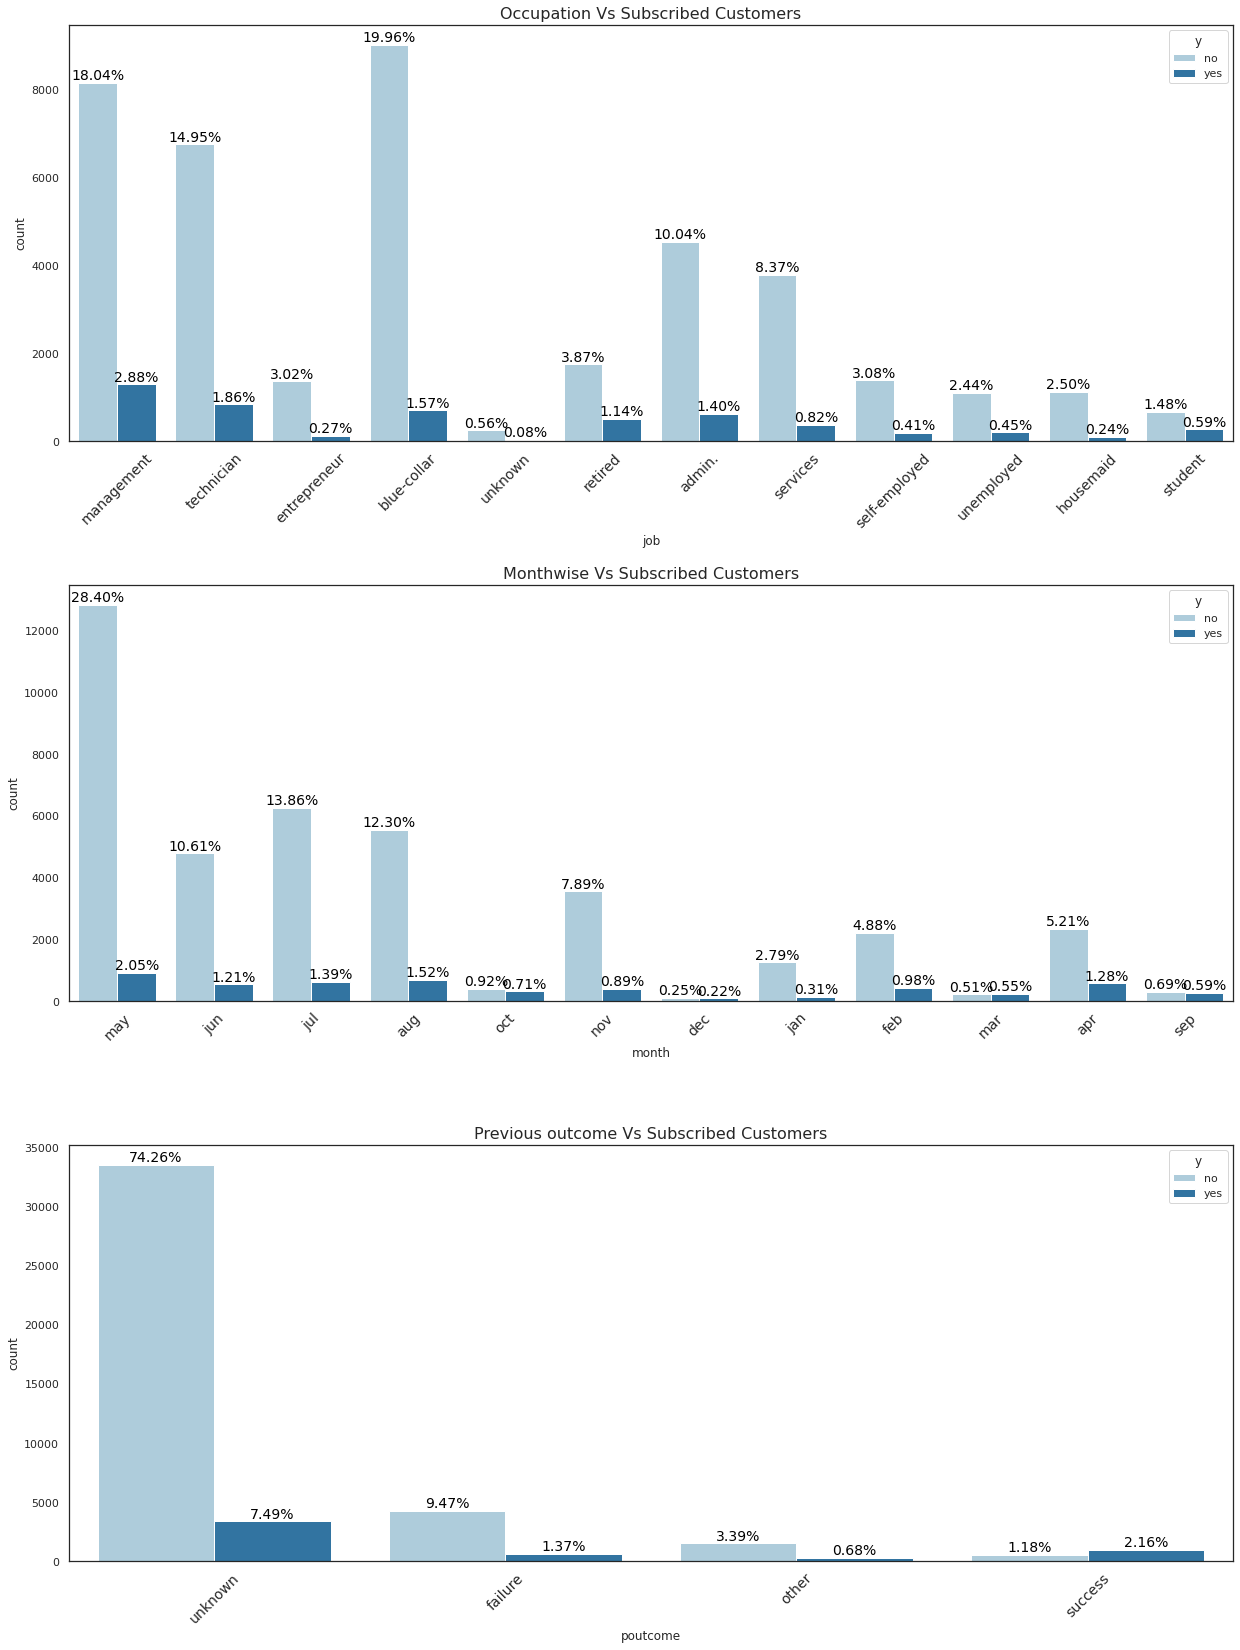

In [34]:
cat = ['job', 'month', 'poutcome']


title = ['Occupation Vs Subscribed Customers', 'Monthwise Vs Subscribed Customers', 'Previous outcome Vs Subscribed Customers']

fig, axes = plt.subplots(nrows = 3,ncols = 1, figsize = (20,25))
fig.tight_layout(pad=10.0)


for i, item in enumerate(cat):
    if i < 3:
        ax = sns.countplot(x=Train_df[item], hue="y", data=Train_df, ax=axes[i], palette="Paired")
        ax.set_xticklabels(Train_df[item].unique(), rotation=45, fontsize =14)
        total=Train_df[item].count()
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}%'.format(100 * p.get_height()/total),
                    fontsize=14, color='black', ha='center', va='bottom')       
                          
#Title
for i, item in enumerate(title):
    if i < 3:
        ax = axes[i]
        ax.set_title(item,fontsize=16)
          

### Inference:
- ***Outcome of previous marketing:*** Customers whose previous outcome is unknown have actually subscribed more than any other group of customers belonging to previous outcome. Among the group of customers with previous outcome as success, have actually subscribed more for the deposits than who have not subscribed for the deposits.

- ***Month:*** Customers contacted in th month of May has higher probability to subscribe for longer term deposits but have also higher chances for not subscribing the long term deposits. Very few customers are contacted in the month of December, March, September,October and have almost equal chances for subscribing the deposits or not.




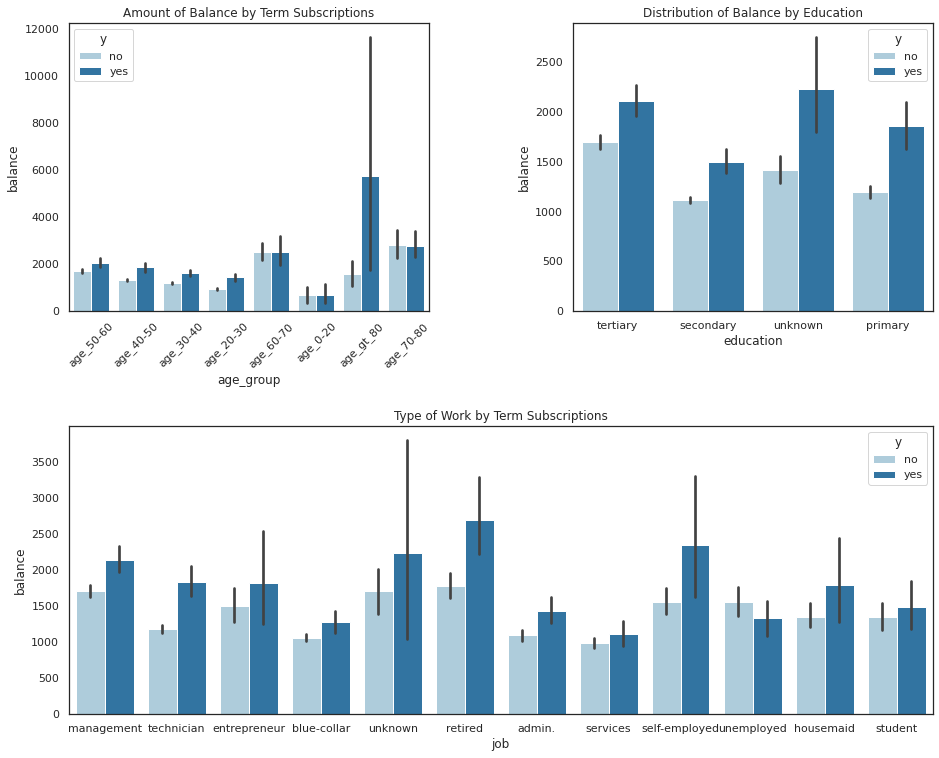

In [35]:
fig = plt.figure(figsize=(15,12))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)


g = sns.barplot(x="age_group", y="balance", hue="y", data=Train_df, palette="Paired", ax=ax1)
g.set_xticklabels(Train_df["age_group"].unique(), rotation=45)
g.set_title("Amount of Balance by Term Subscriptions")

g1 = sns.barplot(data=Train_df, x="education", y="balance", hue="y", palette="Paired", ax=ax2)
g1.set_title("Distribution of Balance by Education")

g2 = sns.barplot(data=Train_df, x="job", y="balance", hue="y", palette="Paired", ax=ax3)
g2.set_xticklabels(Train_df["job"].unique())
g2.set_title("Type of Work by Term Subscriptions")


plt.show()

### Analysis by Balance:
- ***Balance by Age:*** As expected, the retired are the ones who have the highest balance while student have the lowest.
- ***Balance by Education:*** Customers with tertiary education have the highest balance and tend to subscribe for term deposit.
- ***Balance by Occupation:*** Management and Retirees are the ones who have the highest balance in their accounts.

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

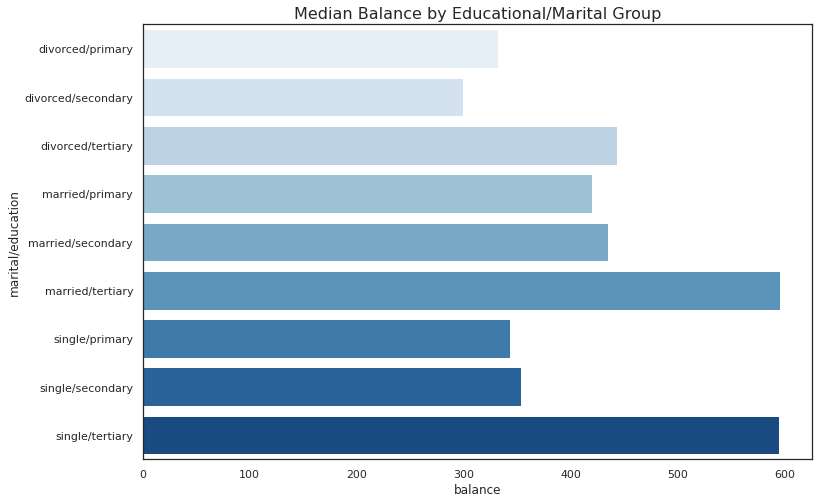

In [36]:
##Lets analyse the clustering of Marital Status and Education 

Train_df['marital/education'] = np.nan
lst = [Train_df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (Train_df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (Train_df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (Train_df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (Train_df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (Train_df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (Train_df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (Train_df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (Train_df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (Train_df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
Train_df.head()


education_groups = Train_df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))


sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="Blues")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

### Inference:
- Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.
- Education: The level of education also has a significant impact on the amount of balance a prospect has.

In [37]:
# Remove the pdays variable and check the dataset

Train_df = Train_df.drop(['pdays','marital/education'],axis=1)
Test_df = Test_df.drop(['pdays'], axis=1)

Train_df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,age_group
0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no,age_50-60
1,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no,age_40-50
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no,age_30-40
3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no,age_40-50
4,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no,age_30-40


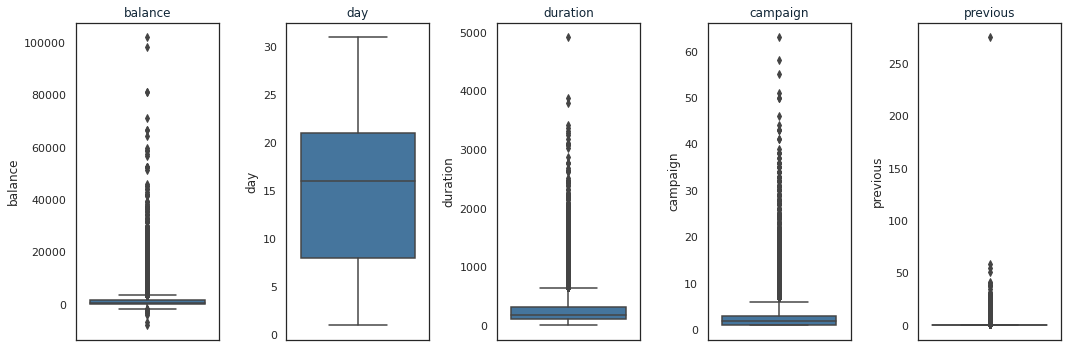

In [38]:
num = ['balance','day','duration', 'campaign', 'previous']

#For Train Data:
data_plot=Train_df[num]

fig=plt.figure(figsize=(15,5))

for i in range(0,len(Train_df.columns)):
    if i<5:
        ax=fig.add_subplot(1,5,i+1)
        sns.boxplot(y=data_plot[data_plot.columns[i]],color='#3776ab')
        ax.set_title(data_plot.columns[i],color='#112637')

    plt.tight_layout()

### Inference: 
We observe that the same columns have outliers, let us try to handle them by using custom function

### 5.5 Outlier Treatment:

In [39]:
# Outlier treatment :  define a custom function- If for a particular column the max value is greater than that assign max value,same logic for min value

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [40]:
for i, item in enumerate(num):
    if i < 6:
        l,u=remove_outlier(Train_df[item])
        Train_df[item]=np.where(Train_df[item]>u,u,Train_df[item])
        Train_df[item]=np.where(Train_df[item]<l,l,Train_df[item])
    

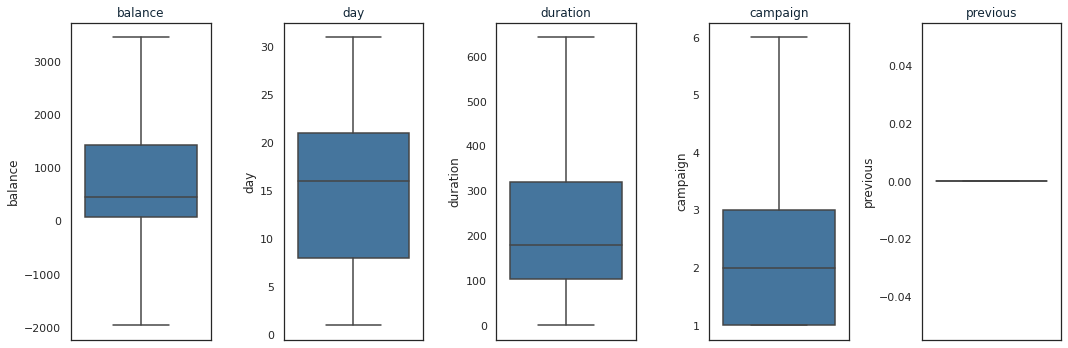

In [41]:
#For Train Data:
data_plot=Train_df[num]

fig=plt.figure(figsize=(15,5))

for i in range(0,len(Train_df.columns)):
    if i<5:
        ax=fig.add_subplot(1,5,i+1)
        sns.boxplot(y=data_plot[data_plot.columns[i]],color='#3776ab')
        ax.set_title(data_plot.columns[i],color='#112637')

    plt.tight_layout()

In [42]:
# Converting binary Nominal dependent variable to numeric
Train_df['y'].replace({'yes':1, 'no':0}, inplace = True)

Lets create a new column by combining the two loans column
New column (loan_status) is based on the two columns['loan','housing'] status i.e. if any of the 2 columns have status 'yes' then 'loan_status' will have 'yes' as status, if none of them have 'yes' as status (i.e. 'no' as status) then 'loan_status' will have 'no' status. Finally droping the existing 'housing','loan' column and adding 'loan_status' column.

In [43]:
# Creating a new column 'loan_status'
def creating_loan_status(Train_df):
    loan_status=[]
    for index in range(len(Train_df)):
        if (Train_df['housing'].loc[index]=='yes' or Train_df['loan'].loc[index]=='yes'):
            loan_status.append('yes')
        elif (Train_df['housing'].loc[index]=='no' or Train_df['loan'].loc[index]=='no'):
            loan_status.append('no')
        
    Train_df.insert(5,'loan_status',loan_status,True)   
    Train_df.drop(['loan','housing'],axis=1,inplace=True)
    return Train_df           
Train_df=creating_loan_status(Train_df)

In [44]:
Train_df.head()

,job,marital,education,default,balance,loan_status,contact,day,month,duration,campaign,previous,poutcome,y,age_group
0,management,married,tertiary,no,2143.0,yes,unknown,5.0,may,261.0,1.0,0.0,unknown,0,age_50-60
1,technician,single,secondary,no,29.0,yes,unknown,5.0,may,151.0,1.0,0.0,unknown,0,age_40-50
2,entrepreneur,married,secondary,no,2.0,yes,unknown,5.0,may,76.0,1.0,0.0,unknown,0,age_30-40
3,blue-collar,married,unknown,no,1506.0,yes,unknown,5.0,may,92.0,1.0,0.0,unknown,0,age_40-50
4,unknown,single,unknown,no,1.0,no,unknown,5.0,may,198.0,1.0,0.0,unknown,0,age_30-40


#### One hot encoding:
Most of the existing machine learning algorithms cannot be executed on categorical data. Instead, the categorical data needs to be converted to numerical data. One-hot encoding is one of the techniques used to perform this conversion. 

In this approach, for each category of a feature, we create a new column (sometimes called a dummy variable) with binary encoding (0 or 1) to denote whether a particular row belongs to this category. 

A potential drawback of this method is a significant increase in the dimensionality of the dataset (which is called a ***Curse of Dimensionality***).

To keep it simple, one-hot encoding is quite a powerful tool, but it is only applicable for categorical data that have a low number of unique values.

Creating dummy variables introduces a form of redundancy to the dataset. If a feature has three categories, we only need to have two dummy variables because, if an observation is neither of the two, it must be the third one. This is often referred to as the ***dummy-variable trap***, and it is a best practice to always remove one dummy variable column (known as the reference) from such an encoding.

Data should not get into dummy variable traps that will lead to a problem known as ***multicollinearity***. Multicollinearity occurs where there is a relationship between the independent variables, and it is a major threat to multiple linear regression and logistic regression problems.


In [45]:
cols = ['marital', 'age_group', 'contact', 'job', 'month', 'poutcome','default','loan_status','education']

#One hot encoding with pandas
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=True) # drops the first category to avoid collinearity
        df = pd.concat([df, dummies], axis=1)
    return df

In [46]:
Train_df = one_hot(Train_df,cols)

# Droping the original columns
Train_df = Train_df.drop(cols,axis=1)

Train_df.head()

,balance,day,duration,campaign,previous,y,marital_married,marital_single,age_group_age_20-30,age_group_age_30-40,age_group_age_40-50,age_group_age_50-60,age_group_age_60-70,age_group_age_70-80,age_group_age_gt_80,contact_telephone,contact_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,loan_status_yes,education_secondary,education_tertiary,education_unknown
0,2143.0,5.0,261.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,29.0,5.0,151.0,1.0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
2,2.0,5.0,76.0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
3,1506.0,5.0,92.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
4,1.0,5.0,198.0,1.0,0.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [47]:
#Find positive and negative correlations:
Train_df_copy = Train_df.copy()
Train_df_copy = Train_df_copy.drop(['y'], axis=1)
correlations = Train_df_copy.corrwith(Train_df.y)
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)

negative_correlations = correlations[correlations <0].sort_values(ascending = False)

print('Most Positive Correlations:\n', positive_correlations)
print('\nMost Negative Correlations:\n', negative_correlations)

Most Positive Correlations:
 duration               0.390659
poutcome_success       0.306788
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
age_group_age_60-70    0.112513
age_group_age_70-80    0.096699
balance                0.092924
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
age_group_age_20-30    0.057478
age_group_age_gt_80    0.046257
month_feb              0.038417
job_management         0.032919
poutcome_other         0.031955
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
job_self-employed      0.000855
job_unknown            0.000267
dtype: float64

Most Negative Correlations:
 month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.01680

Text(0.5, 1.0, 'Correlation with Subscribed Customers \n')

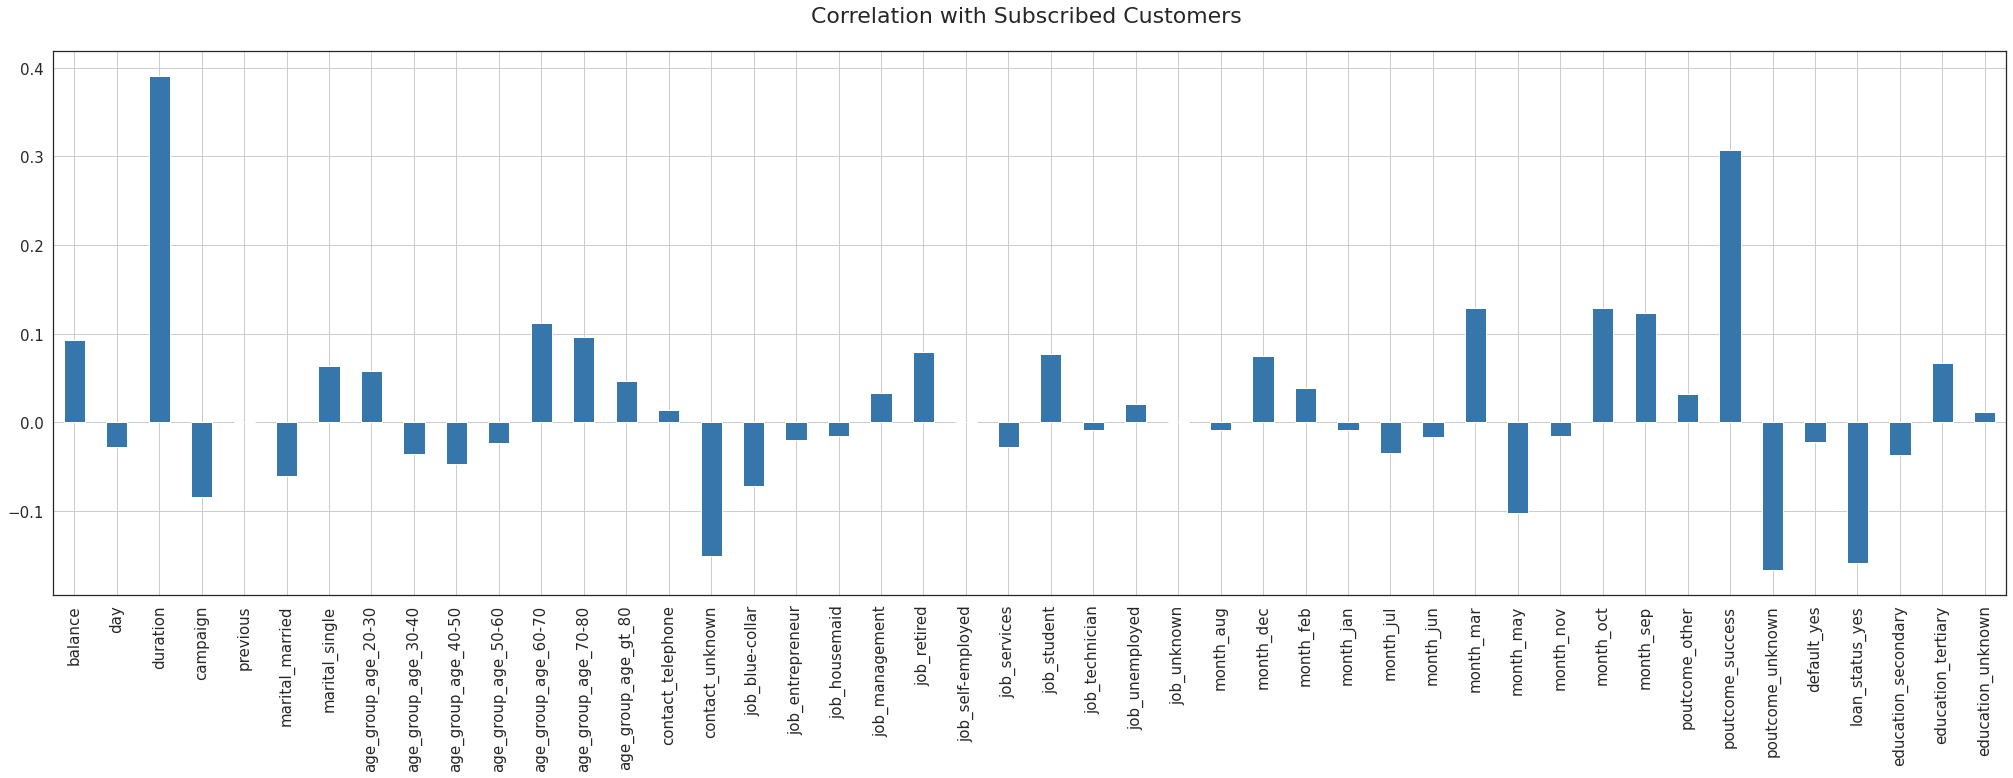

In [48]:
# Plot positive & negative correlations:

correlations.plot.bar(
        figsize = (35,10), 
        fontsize = 15, 
        color = '#3776ab',
        rot = 90, grid = True)

plt.title('Correlation with Subscribed Customers \n', horizontalalignment="center", 
          fontstyle = "normal", fontsize = "22", 
          fontfamily = "sans-serif")


### Inference:
    The above plot shows that (duration, poutcome_success, month_mar, month_oct and month_sep)' are the most positively correlated variables with the dependent variable. Similarly (poutcome_unknown, loan_status_yes, contact_unknown and month_may) are the most negatively correlated variables with y variable.

### Feature Scaling - Standardization:
    The data obtained contains features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely.
    It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.
    Algorithms that fit a model that use a weighted sum of input variables are affected, such as linear regression, logistic regression, artificial neural networks, k-nearest neighbors and support vector machines.  

In [49]:
# Splitting the independent and dependent variables
X = Train_df.drop(['y'], axis=1)
y = Train_df['y']

From the above plot we cannot identify the distribution of a each variable. For that all variables must be on same scale, hence we do scaling.

In [50]:
#Train - Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=123,stratify=y)

##### Standard Scaler:
- This standard scaller standardizes the features by removing the mean and scaling to unit variance.
- The standard score of a sample x is calculated as:

        z = (x - u) / s

where,
- u is the mean of the training samples or zero if with_mean=False,
- s is the standard deviation of the training samples or one if with_std=False.

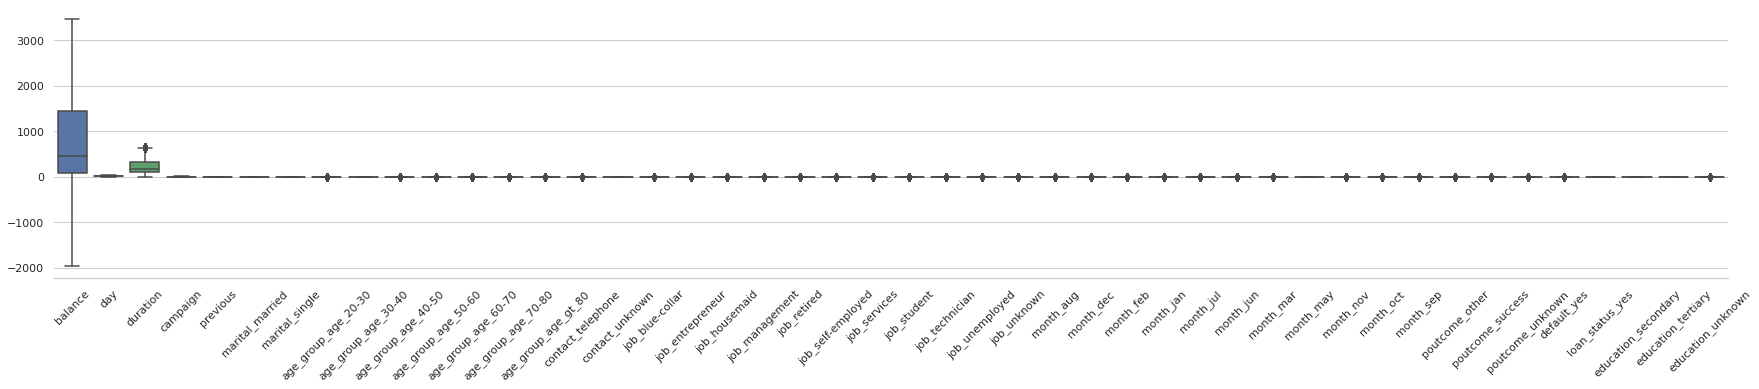

In [51]:
# Before scaling

fig=plt.figure(figsize=(30,5))

sns.set_style("whitegrid")
sns.boxplot(data=X_train,  palette="deep")
plt.xticks(rotation=45)
sns.despine(left=True)

In [52]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

col_names = X_train.columns

# copy of datasets
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()
Test_scaled = Test_df.copy()

   
# fit on training data column
scale = StandardScaler().fit(X_train_sc)
    
# transform the training data column
X_train_sc = pd.DataFrame(scale.transform(X_train_sc))
X_train_sc.columns=col_names

    
# transform the testing data column
X_test_sc = pd.DataFrame(scale.transform(X_test_sc))
X_test_sc.columns=col_names

#Test_scaled = pd.DataFrame(scale.transform(Test_scaled))
#Test_scaled.columns=col_names


In [53]:
X_train_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,30291.0,1.742578e-16,1.000017,-2.453447,-0.733538,-0.414754,0.432095,2.132979
day,30291.0,5.287771e-17,1.000017,-1.779482,-0.939858,0.019712,0.619443,1.818905
duration,30291.0,1.267698e-16,1.000017,-1.322624,-0.740813,-0.317165,0.462348,2.309454
campaign,30291.0,1.124462e-16,1.000017,-0.870457,-0.870457,-0.248212,0.374033,2.240768
previous,30291.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
marital_married,30291.0,-3.179846e-15,1.000017,-1.229085,-1.229085,0.813613,0.813613,0.813613
marital_single,30291.0,2.160051e-15,1.000017,-0.627671,-0.627671,-0.627671,1.593190,1.593190
age_group_age_20-30,30291.0,5.733642e-16,1.000017,-0.427258,-0.427258,-0.427258,-0.427258,2.340507
age_group_age_30-40,30291.0,5.119172e-16,1.000017,-0.798066,-0.798066,-0.798066,1.253030,1.253030
age_group_age_40-50,30291.0,1.291042e-15,1.000017,-0.575686,-0.575686,-0.575686,-0.575686,1.737059


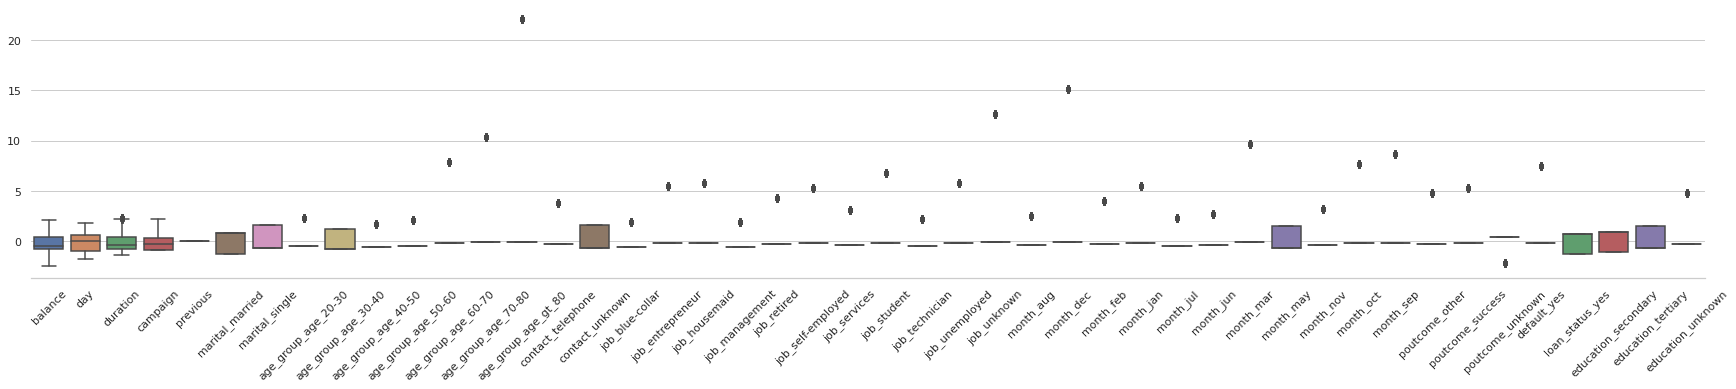

In [54]:
# After scaling

fig=plt.figure(figsize=(30,5))

sns.set_style("whitegrid")
sns.boxplot(data=X_train_sc,  palette="deep")
plt.xticks(rotation=45)
sns.despine(left=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


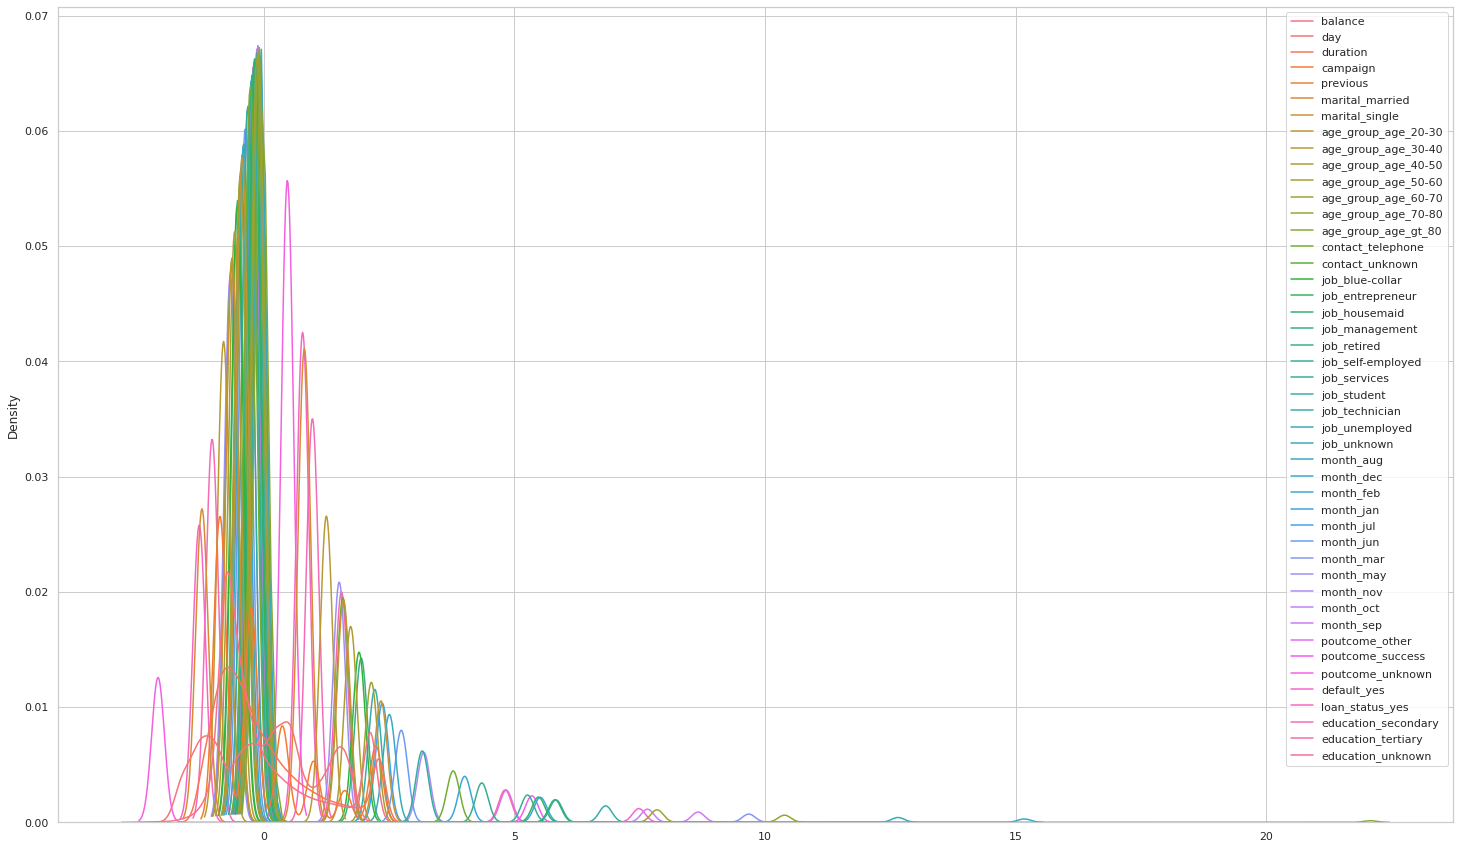

In [55]:
fig=plt.figure(figsize=(25,15))
sns.kdeplot(data=X_train_sc)

### Model Building - Imbalanced data

In [56]:
model = list()
dataset = list()
resample = list()
precision = list()
recall = list()
F1score = list()
Accuracy = list()
AUCROC = list()

In [57]:
def train_eval(clf_model, X_train, y_train, algo=None, sampling=None):
    
    # Test set prediction
    y_prob=clf_model.predict_proba(X_train)
    y_pred=clf_model.predict(X_train)

    print('Classification Report for Train dataset')
    print('='*60)
    print(classification_report(y_train,y_pred),"\n")
    
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_train, y_prob[:,1]),"\n")
    
    print('Confusion Matrix')
    print('='*60)
    
    cf_matrix = confusion_matrix(y_train, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
          
    model.append(algo)
    precision.append(precision_score(y_train,y_pred))
    recall.append(recall_score(y_train,y_pred))
    F1score.append(f1_score(y_train,y_pred))
    Accuracy.append(accuracy_score(y_train, y_pred))
    AUCROC.append(roc_auc_score(y_train, y_prob[:,1]))
    dataset.append('train')
    resample.append(sampling)
   

In [58]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Classification Report for Test dataset')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]),"\n")
    
    print('Confusion Matrix')
    print('='*60)
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    Accuracy.append(accuracy_score(y_test, y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    dataset.append('test')
    resample.append(sampling)

### Model-1: Logistic Regression

In [59]:
log_model=LogisticRegression()
params={'C':np.logspace(1,10),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

# Create random search using 5-fold cross validation
clf_LR = RandomizedSearchCV(log_model, params, cv=cv, scoring='recall', n_jobs=-1)
clf_LR.fit(X_train_sc, y_train)
clf_LR = clf_LR.best_estimator_

In [60]:
clf_LR

LogisticRegression(C=1048.1131341546863, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Feature Importance

In [61]:
print (pd.DataFrame(clf_LR.coef_[0], columns = ["Imp"], index = X_train_sc.columns    
    ).sort_values('Imp',ascending=False))

                          Imp
duration             1.465391
poutcome_success     0.446899
month_mar            0.185156
education_tertiary   0.182155
month_oct            0.179199
balance              0.154436
month_sep            0.104810
age_group_age_60-70  0.081737
education_unknown    0.063685
month_jun            0.062332
education_secondary  0.061873
job_student          0.057551
age_group_age_70-80  0.048383
poutcome_other       0.047986
month_dec            0.039576
day                  0.025160
marital_single       0.023917
previous             0.000000
age_group_age_gt_80 -0.007717
default_yes         -0.021202
job_unemployed      -0.025122
contact_telephone   -0.025204
month_feb           -0.031723
job_entrepreneur    -0.072634
job_unknown         -0.073486
job_self-employed   -0.081148
job_services        -0.106382
job_retired         -0.109529
poutcome_unknown    -0.111246
job_technician      -0.128253
job_housemaid       -0.130111
job_management      -0.134851
marital_ma

### Which Features Influence the Result of a Term Deposit Subscription?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


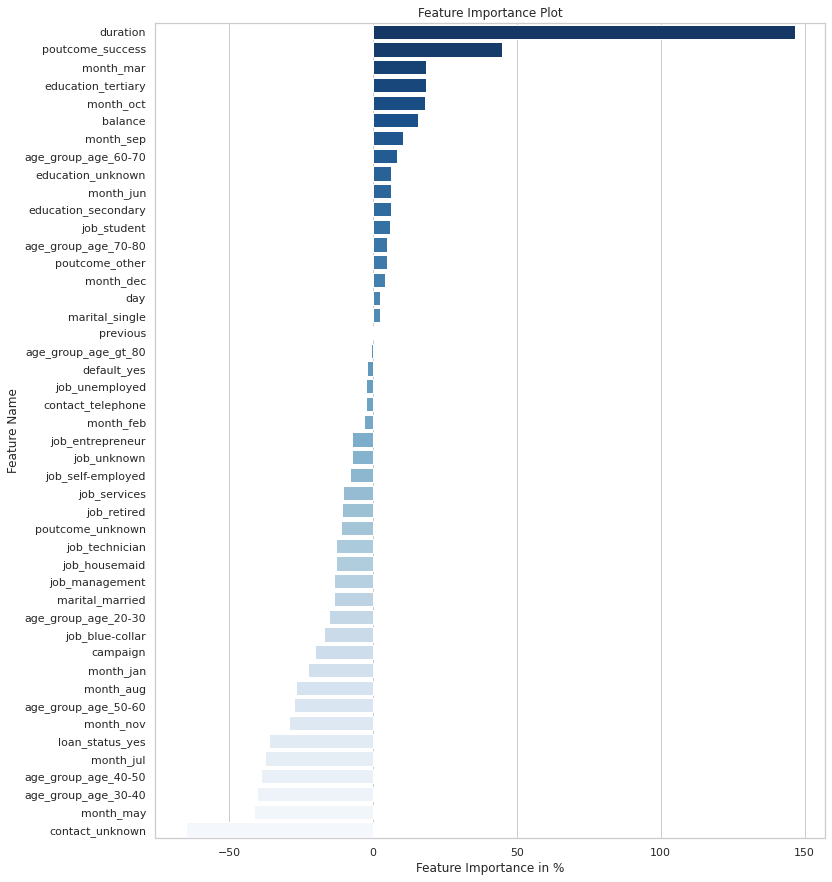

In [62]:
x=pd.DataFrame(clf_LR.coef_[0]*100,index=X_train_sc.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,15))
sns.barplot(x[0], x.index, palette='Blues_r')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [64]:
from sklearn.feature_selection import SelectFromModel

# Feature selection

def select_features(clf_model, X_train, y_train, X_test, threshold, max_features):

# Select features which have higher contribution in the final prediction

    fs = SelectFromModel(clf_model, threshold = threshold, max_features = max_features) 
    
# learn relationship from training data
    fs.fit(X_train, y_train)

# transform train input data
    X_train_fs = fs.transform(X_train)

# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


In [65]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(clf_LR, X_train_sc, y_train, X_test_sc, 0.03, 15)

In [66]:
clf_LR.fit(X_train_fs, y_train)

LogisticRegression(C=1048.1131341546863, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     26747
           1       0.39      0.84      0.54      3544

    accuracy                           0.83     30291
   macro avg       0.68      0.84      0.72     30291
weighted avg       0.91      0.83      0.85     30291
 

AUC-ROC
0.9047697148964028 

Confusion Matrix


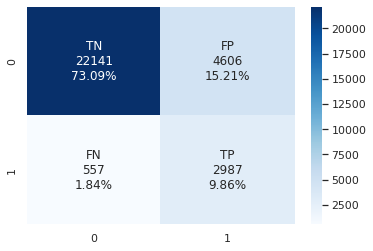

In [67]:
#Train:
train_eval(clf_LR, X_train_fs, y_train, 'Logistic Regression', 'actual')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     13175
           1       0.38      0.83      0.53      1745

    accuracy                           0.82     14920
   macro avg       0.68      0.83      0.71     14920
weighted avg       0.90      0.82      0.85     14920
 

AUC-ROC
0.9043223957851927 

Confusion Matrix


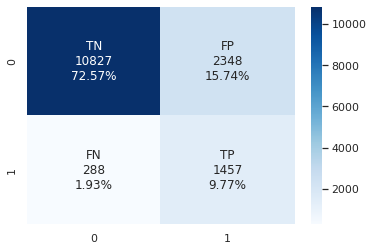

In [68]:
#Test:
test_eval(clf_LR, X_test_fs, y_test, 'Logistic Regression', 'actual')

In [69]:
y_pred = clf_LR.predict(X_train_fs)
Accuracy_Train =  accuracy_score(y_train, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_LR.predict(X_test_fs)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.8295533326730712
Accuracy_Test 0.8233243967828419


### Model-2: Naïve Bayes

In [70]:
clf_nb = GaussianNB()
clf_nb.fit(X_train_sc, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf_nb, X_train_sc, y_train)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_sc.shape[1]):
       print ("%d. %s (%f)" % (f + 1, X_train_sc.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. poutcome_success (0.028140)
2. month_oct (0.010122)
3. age_group_age_60-70 (0.009534)
4. month_sep (0.008148)
5. month_mar (0.007223)
6. job_student (0.006160)
7. age_group_age_70-80 (0.005460)
8. month_dec (0.002819)
9. age_group_age_gt_80 (0.001208)
10. duration (0.001195)
11. job_retired (0.001050)
12. age_group_age_50-60 (0.000178)
13. education_tertiary (0.000152)
14. campaign (0.000145)
15. loan_status_yes (0.000073)
16. balance (0.000073)
17. job_services (0.000066)
18. age_group_age_30-40 (0.000059)
19. job_self-employed (0.000059)
20. education_unknown (0.000046)
21. month_nov (0.000026)
22. job_blue-collar (0.000007)
23. previous (0.000000)
24. job_management (-0.000007)
25. month_jan (-0.000013)
26. job_unknown (-0.000046)
27. age_group_age_20-30 (-0.000053)
28. job_technician (-0.000059)
29. marital_single (-0.000066)
30. contact_telephone (-0.000066)
31. education_secondary (-0.000079)
32. month_jun (-0.000092)
33. default_yes (-0.000112)
34. job_housem

Observe that the Permutation Importance is dataset dependent and you have to pass a dataset to obtain the values. This can be either the same data you used to train the model, i.e. X_train and y_train, or a hold-out set that you saved for evaluation, like X_test and y_test. Using a held-out set makes it possible to highlight which features contribute the most to the generalization power of the inspected model. Features that are important on the training set but not on the held-out set might cause the model to overfit.

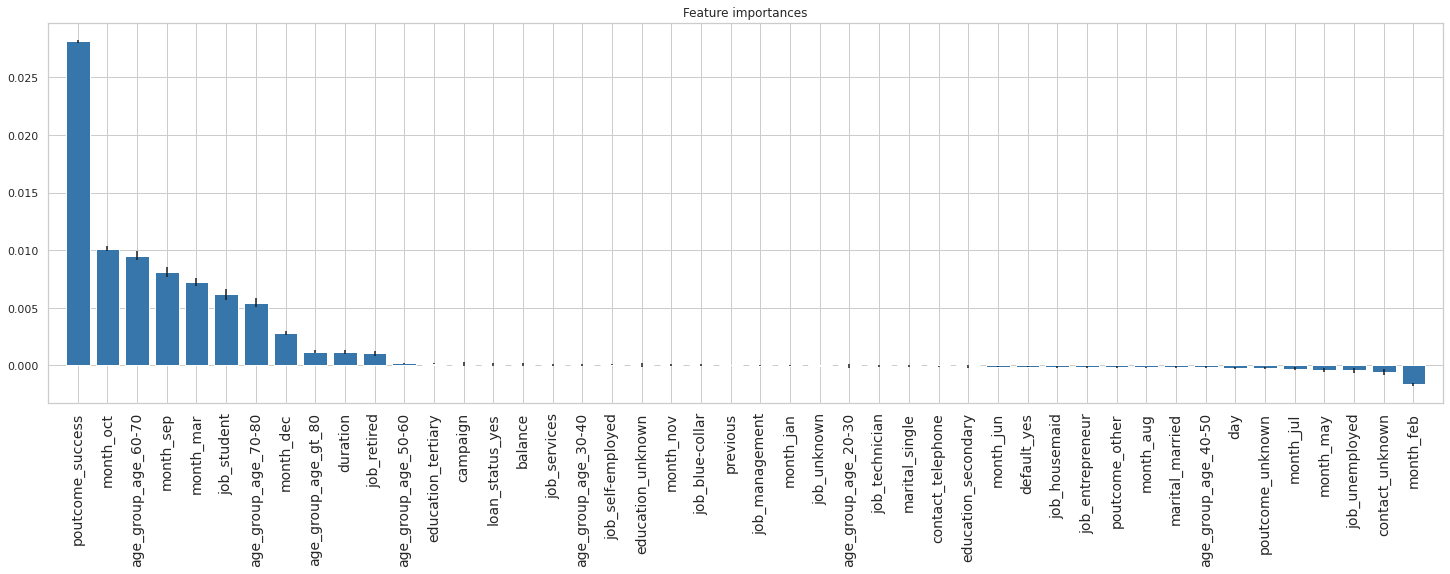

In [72]:
plt.figure(figsize=(25, 7))
plt.title("Feature importances")
plt.bar(range(X_train_sc.shape[1],), importances[indices], color="#3776ab", yerr=std[indices], align="center")
plt.xticks(range(X_train_sc.shape[1]), [X_train_sc.columns[indices[i]] for i in range(46)])
plt.xlim([-1, X_train_sc.shape[1]])
plt.xticks(rotation=90, fontsize = 14)
plt.show()

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     26747
           1       0.44      0.40      0.42      3544

    accuracy                           0.87     30291
   macro avg       0.68      0.67      0.67     30291
weighted avg       0.86      0.87      0.87     30291
 

AUC-ROC
0.8154947769083785 

Confusion Matrix


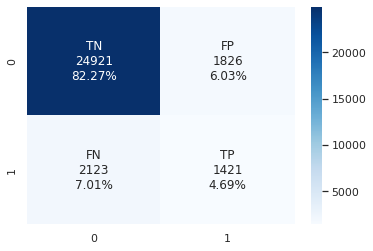

In [74]:
#Train:
train_eval(clf_nb, X_train_sc, y_train, 'Naive Bayes', 'actual')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     13175
           1       0.45      0.39      0.42      1745

    accuracy                           0.87     14920
   macro avg       0.69      0.66      0.67     14920
weighted avg       0.87      0.87      0.87     14920
 

AUC-ROC
0.8108698313968346 

Confusion Matrix


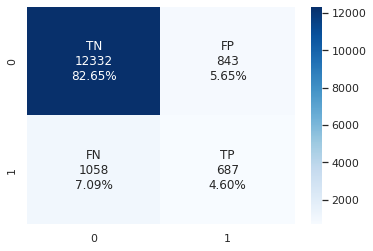

In [75]:
#Test:
test_eval(clf_nb, X_test_sc, y_test, 'Naive Bayes', 'actual')

In [76]:
y_pred = clf_nb.predict(X_train_sc)
Accuracy_Train =  accuracy_score(y_train, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_nb.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.8696312436037107
Accuracy_Test 0.8725871313672923


### Model-3: Stochastic Gradient Descent

In [77]:
clf_sgd = SGDClassifier(loss='modified_huber', shuffle=True, penalty = 'l1',alpha = 0.0005, random_state=123)
clf_sgd.fit(X_train_sc, y_train)

SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     26747
           1       0.58      0.41      0.48      3544

    accuracy                           0.90     30291
   macro avg       0.75      0.69      0.71     30291
weighted avg       0.89      0.90      0.89     30291
 

AUC-ROC
0.8901419641923514 

Confusion Matrix


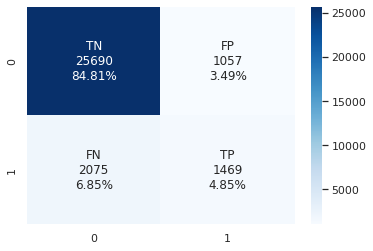

In [78]:
#Train:
train_eval(clf_sgd, X_train_sc, y_train, 'Stochastic Gradient Descent', 'actual')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     13175
           1       0.56      0.38      0.45      1745

    accuracy                           0.89     14920
   macro avg       0.74      0.67      0.70     14920
weighted avg       0.88      0.89      0.88     14920
 

AUC-ROC
0.8862618595825428 

Confusion Matrix


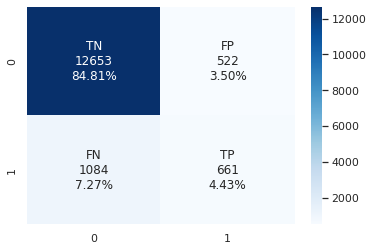

In [79]:
#Test:
test_eval(clf_sgd, X_test_sc, y_test, 'Stochastic Gradient Descent', 'actual')

In [80]:
y_pred = clf_sgd.predict(X_train_sc)
Accuracy_Train =  accuracy_score(y_train, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_sgd.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.8966029513716945
Accuracy_Test 0.8923592493297587


### Model-4: K-Nearest Neighbours

In [81]:
clf_knn = KNeighborsClassifier(n_neighbors = 5)
clf_knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     26747
           1       0.58      0.41      0.48      3544

    accuracy                           0.90     30291
   macro avg       0.75      0.69      0.71     30291
weighted avg       0.89      0.90      0.89     30291
 

AUC-ROC
0.8901419641923514 

Confusion Matrix


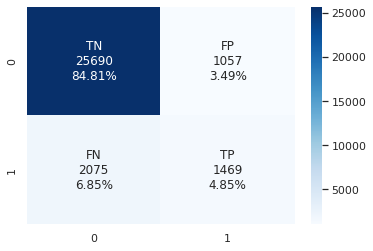

In [82]:
#Train:
train_eval(clf_sgd, X_train_sc, y_train, 'Nearest Neighbours', 'actual')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     13175
           1       0.56      0.38      0.45      1745

    accuracy                           0.89     14920
   macro avg       0.74      0.67      0.70     14920
weighted avg       0.88      0.89      0.88     14920
 

AUC-ROC
0.8862618595825428 

Confusion Matrix


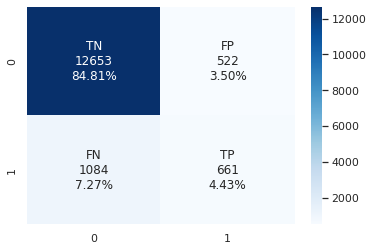

In [83]:
#Test:
test_eval(clf_sgd, X_test_sc, y_test, 'Nearest Neighbours', 'actual')

In [84]:
y_pred = clf_sgd.predict(X_train_sc)
Accuracy_Train =  accuracy_score(y_train, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_sgd.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.8966029513716945
Accuracy_Test 0.8923592493297587


### Model-5: Decision Tree

In [98]:
#Number of trees in random forest

#estimators = [2,10,30,50,100,150]
estimators = [30,50,100,300,500]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of depth in each tree:
max_depth = [i for i in range(5,25,2)]

# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]

# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [5, 4, 7]

In [99]:
tree_model = DecisionTreeClassifier()

tree_param_grid = {'max_depth': max_depth,
                   'max_features':max_features,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='recall', random_state=123, n_jobs=-1, verbose=2)
clf_DT.fit(X_train_sc, y_train)
clf_DT = clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


In [100]:
clf_DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=21, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
#Fitting a DecisionTreeClassifier and summarizing the calculated feature importance scores is listed below.

print (pd.DataFrame(clf_DT.feature_importances_, columns = ["Imp"], index = X_train_sc.columns   
    ).sort_values('Imp',ascending=False))

                          Imp
duration             0.386985
poutcome_success     0.214451
day                  0.061823
balance              0.055143
loan_status_yes      0.032837
campaign             0.028832
month_mar            0.019972
contact_unknown      0.019798
month_aug            0.011449
month_sep            0.011339
marital_married      0.010100
age_group_age_30-40  0.009231
age_group_age_60-70  0.008864
marital_single       0.008196
month_jul            0.007757
month_oct            0.007670
poutcome_unknown     0.007268
month_nov            0.007192
age_group_age_20-30  0.007137
month_feb            0.006959
job_blue-collar      0.006772
month_jun            0.006568
month_may            0.006503
education_tertiary   0.006049
age_group_age_50-60  0.005363
contact_telephone    0.004600
age_group_age_40-50  0.004536
job_student          0.004426
poutcome_other       0.004014
job_technician       0.003804
month_jan            0.003609
education_secondary  0.003607
job_retire

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


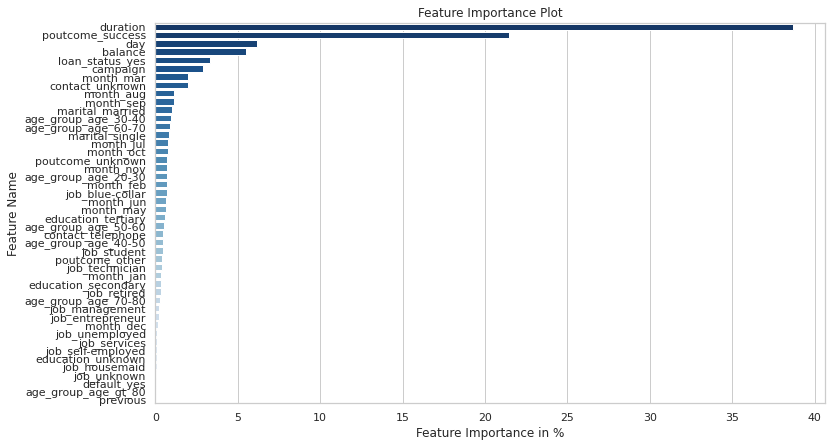

In [102]:
x=pd.DataFrame(clf_DT.feature_importances_*100,index=X_train_sc.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0], x.index, palette='Blues_r')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [103]:
# Feature selection (threshold = 0.03)
X_train_fs, X_test_fs, fs = select_features(clf_DT, X_train, y_train, X_test, 0.03, 13)

In [104]:
clf_DT.fit(X_train_fs, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=21, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     26747
           1       0.70      0.51      0.59      3544

    accuracy                           0.92     30291
   macro avg       0.82      0.74      0.77     30291
weighted avg       0.91      0.92      0.91     30291
 

AUC-ROC
0.9521529586955639 

Confusion Matrix


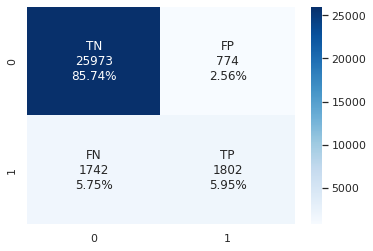

In [105]:
#Train: 
train_eval(clf_DT, X_train_fs, y_train, 'Decision Tree', 'actual')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     13175
           1       0.49      0.35      0.41      1745

    accuracy                           0.88     14920
   macro avg       0.70      0.65      0.67     14920
weighted avg       0.87      0.88      0.87     14920
 

AUC-ROC
0.7887034030545392 

Confusion Matrix


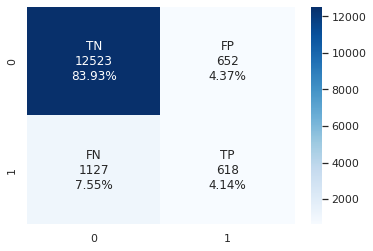

In [106]:
#Test:
test_eval(clf_DT, X_test_fs, y_test, 'Decision Tree', 'actual')

In [107]:
y_pred = clf_DT.predict(X_train_fs)
Accuracy_Train =  accuracy_score(y_train, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_DT.predict(X_test_fs)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)


Accuracy_Train 0.9169390247928427
Accuracy_Test 0.8807640750670241


### Model-6: Random Forest

In [108]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_leaf': min_samples_leaf,
           'min_samples_split':min_samples_split}

cv = StratifiedKFold(n_splits=5)

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='recall', n_jobs=-1, random_state=123, n_iter=20, verbose=2)
clf_RF.fit(X_train_sc, y_train)
clf_RF = clf_RF.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.1min finished


In [109]:
clf_RF 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
#Fitting a RandomForestClassifier and summarizing the calculated feature importance scores is listed below.

print (pd.DataFrame(clf_RF.feature_importances_, columns = ["Imp"], index = X_train_sc.columns    
    ).sort_values('Imp',ascending=False))

                          Imp
duration             0.387027
poutcome_success     0.120168
day                  0.057038
balance              0.055576
loan_status_yes      0.038907
poutcome_unknown     0.033863
contact_unknown      0.028157
campaign             0.023108
month_oct            0.021261
month_mar            0.020748
age_group_age_60-70  0.014420
month_sep            0.014103
month_jun            0.013525
month_may            0.012408
month_aug            0.011388
marital_married      0.008703
month_jul            0.008641
age_group_age_20-30  0.007799
education_tertiary   0.007696
marital_single       0.007453
month_nov            0.007318
job_student          0.006993
month_feb            0.006985
age_group_age_70-80  0.006823
education_secondary  0.006808
age_group_age_30-40  0.006373
job_blue-collar      0.005993
age_group_age_40-50  0.005944
job_technician       0.005938
job_management       0.005837
job_retired          0.005709
age_group_age_50-60  0.005358
month_jan 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


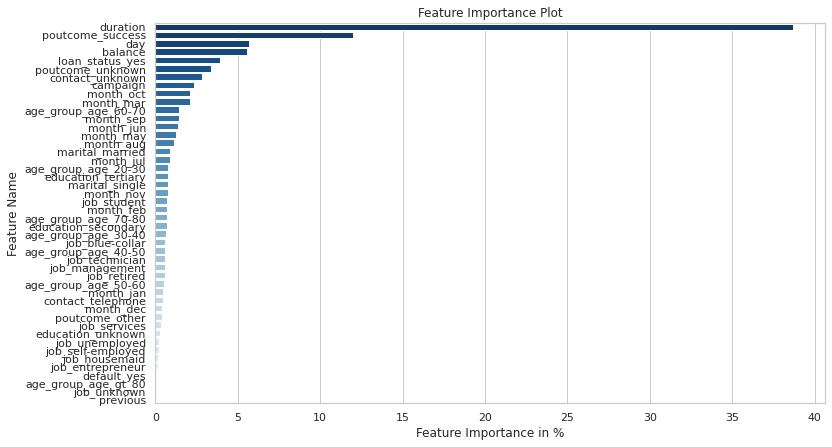

In [112]:
x=pd.DataFrame(clf_RF.feature_importances_*100,index=X_train_sc.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0], x.index, palette='Blues_r')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [113]:
# feature selection (threshold = 0.008, max_features=13)
X_train_fs, X_test_fs, fs = select_features(clf_RF, X_train_sc, y_train, X_test_sc, 0.008, 13)

In [114]:
print(X_train_sc.columns[fs.get_support()])
print(X_test_sc.columns[fs.get_support()])

Index(['balance', 'day', 'duration', 'campaign', 'age_group_age_60-70',
       'contact_unknown', 'month_jun', 'month_mar', 'month_oct', 'month_sep',
       'poutcome_success', 'poutcome_unknown', 'loan_status_yes'],
      dtype='object')
Index(['balance', 'day', 'duration', 'campaign', 'age_group_age_60-70',
       'contact_unknown', 'month_jun', 'month_mar', 'month_oct', 'month_sep',
       'poutcome_success', 'poutcome_unknown', 'loan_status_yes'],
      dtype='object')


In [115]:
clf_RF.fit(X_train_fs, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     26747
           1       0.78      0.48      0.59      3544

    accuracy                           0.92     30291
   macro avg       0.86      0.73      0.78     30291
weighted avg       0.92      0.92      0.91     30291
 

AUC-ROC
0.9577012223307085 

Confusion Matrix


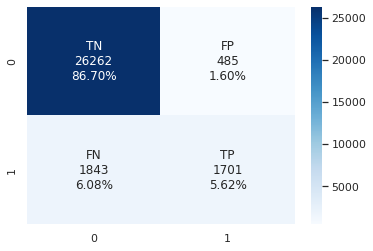

In [116]:
#Train:
train_eval(clf_RF, X_train_fs, y_train, 'Random Forest', 'actual')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13175
           1       0.63      0.36      0.46      1745

    accuracy                           0.90     14920
   macro avg       0.77      0.67      0.70     14920
weighted avg       0.89      0.90      0.89     14920
 

AUC-ROC
0.9138265469788988 

Confusion Matrix


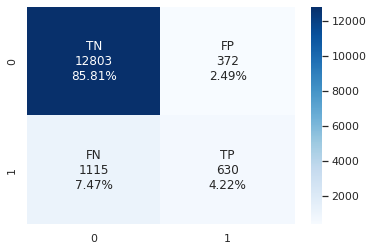

In [117]:
#Test:
test_eval(clf_RF, X_test_fs, y_test, 'Random Forest', 'actual')

In [118]:
y_pred = clf_RF.predict(X_train_fs)
Accuracy_Train =  accuracy_score(y_train, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_RF.predict(X_test_fs)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.9231454887590373
Accuracy_Test 0.9003351206434317


### Model Comparision for imbalanced data

In [119]:
clf_eval_df = pd.DataFrame({'Model':model,
                            'Dataset':dataset,
                            'Resample':resample,
                            'Precision':precision,
                            'Recall':recall,
                            'f1-score':F1score,
                            'Accuracy':Accuracy,
                            'AUC-ROC':AUCROC})

In [120]:
cm = sns.light_palette("green", as_cmap = True)
s = clf_eval_df.style.background_gradient(cmap=cm)
s

,Model,Dataset,Resample,Precision,Recall,f1-score,Accuracy,AUC-ROC
0,Logistic Regression,train,actual,0.393389,0.842833,0.536410,0.829553,0.904770
1,Logistic Regression,test,actual,0.382917,0.834957,0.525045,0.823324,0.904322
2,Naive Bayes,train,actual,0.437635,0.400959,0.418495,0.869631,0.815495
3,Naive Bayes,test,actual,0.449020,0.393696,0.419542,0.872587,0.810870
4,Stochastic Gradient Descent,train,actual,0.581552,0.414503,0.484020,0.896603,0.890142
5,Stochastic Gradient Descent,test,actual,0.558749,0.378797,0.451503,0.892359,0.886262
6,Nearest Neighbours,train,actual,0.581552,0.414503,0.484020,0.896603,0.890142
7,Nearest Neighbours,test,actual,0.558749,0.378797,0.451503,0.892359,0.886262
8,Decision Tree,train,actual,0.755587,0.457957,0.570274,0.919250,0.954500
9,Decision Tree,test,actual,0.478220,0.289398,0.360586,0.879960,0.783691


### SMOTE:

In [121]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE(random_state = 123)

#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smt.fit_resample(X_train_sc, y_train.ravel())

counter = Counter(y_train_smote)
print('After',counter)

print('\nAfter OverSampling, the shape of X_train: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_smote.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before Counter({0: 26747, 1: 3544})
After Counter({0: 26747, 1: 26747})

After OverSampling, the shape of X_train: (53494, 46)
After OverSampling, the shape of y_train: (53494,) 



In [123]:
# Oversampling the train dataset using SMOTE
smt = SMOTE(random_state = 123)

#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train_sc, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [124]:
model = list()
dataset = list()
resample = list()
precision = list()
recall = list()
F1score = list()
Accuracy = list()
AUCROC = list()

### Model-1: Logistic Regression - SMOTE Resampling

In [125]:
clf_LR.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1048.1131341546863, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     26747
           1       0.84      0.87      0.86     26747

    accuracy                           0.85     53494
   macro avg       0.85      0.85      0.85     53494
weighted avg       0.85      0.85      0.85     53494
 

AUC-ROC
0.9197073948949451 

Confusion Matrix


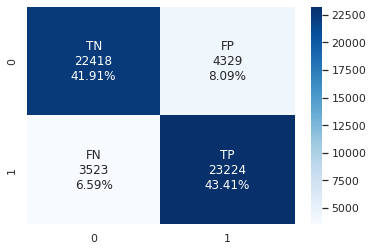

In [126]:
#Train:
train_eval(clf_LR, X_train_sm, y_train_sm, 'Logistic Regression', 'smote')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     13175
           1       0.40      0.82      0.53      1745

    accuracy                           0.83     14920
   macro avg       0.68      0.83      0.72     14920
weighted avg       0.91      0.83      0.85     14920
 

AUC-ROC
0.9078987184854531 

Confusion Matrix


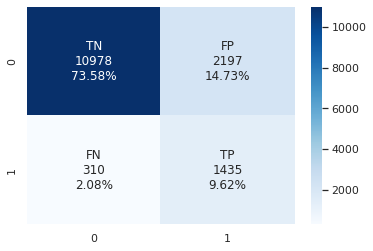

In [127]:
#Test:
test_eval(clf_LR, X_test_sc, y_test, 'Logistic Regression', 'smote')

In [128]:
y_pred = clf_LR.predict(X_train_sm)
Accuracy_Train =  accuracy_score(y_train_sm, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_LR.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)


Accuracy_Train 0.853217183235503
Accuracy_Test 0.831970509383378


### Model-2: Naïve Bayes - SMOTE Resampling

In [129]:
clf_nb.fit(X_train_sm, y_train_sm)

GaussianNB(priors=None, var_smoothing=1e-09)

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.62      0.92      0.74     26747
           1       0.85      0.42      0.56     26747

    accuracy                           0.67     53494
   macro avg       0.73      0.67      0.65     53494
weighted avg       0.73      0.67      0.65     53494
 

AUC-ROC
0.8199280063805356 

Confusion Matrix


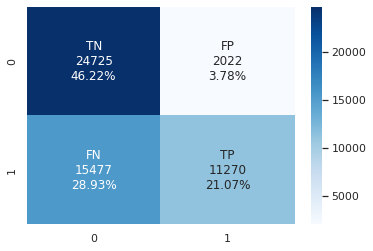

In [130]:
# Train:
train_eval(clf_nb, X_train_sm, y_train_sm, 'Naive Bayes', 'smote')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     13175
           1       0.44      0.42      0.43      1745

    accuracy                           0.87     14920
   macro avg       0.68      0.68      0.68     14920
weighted avg       0.87      0.87      0.87     14920
 

AUC-ROC
0.8082432757186431 

Confusion Matrix


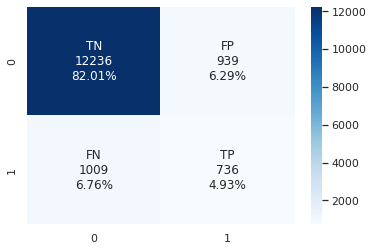

In [131]:
#Test:
test_eval(clf_nb, X_test_sc, y_test, 'Naive Bayes', 'smote')

In [132]:
y_pred = clf_nb.predict(X_train_sm)
Accuracy_Train =  accuracy_score(y_train_sm, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_nb.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.6728792014057652
Accuracy_Test 0.8694369973190349


### Model-3: Stochastic Gradient Descent - SMOTE Resampling

In [133]:
clf_sgd.fit(X_train_sm, y_train_sm)

SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.87      0.82      0.85     26747
           1       0.83      0.88      0.85     26747

    accuracy                           0.85     53494
   macro avg       0.85      0.85      0.85     53494
weighted avg       0.85      0.85      0.85     53494
 

AUC-ROC
0.9144626842947543 

Confusion Matrix


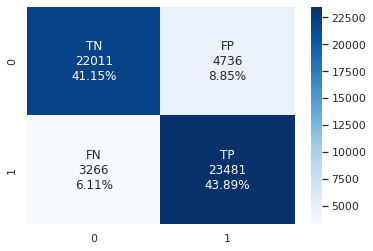

In [134]:
#Train:
train_eval(clf_sgd, X_train_sm, y_train_sm, 'Stochastic Gradient Descent', 'smote')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     13175
           1       0.38      0.84      0.53      1745

    accuracy                           0.82     14920
   macro avg       0.68      0.83      0.71     14920
weighted avg       0.91      0.82      0.85     14920
 

AUC-ROC
0.903899370932401 

Confusion Matrix


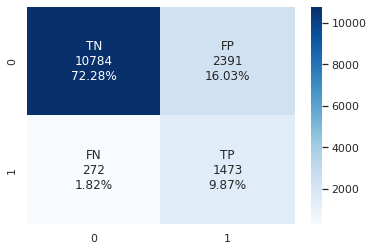

In [135]:
#Test:
test_eval(clf_sgd, X_test_sc, y_test, 'Stochastic Gradient Descent', 'smote')

In [136]:
y_pred = clf_sgd.predict(X_train_sm)
Accuracy_Train =  accuracy_score(y_train_sm, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_sgd.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.8504131304445358
Accuracy_Test 0.821514745308311


### Model-4: K-Nearest Neighbours - SMOTE Resampling

In [137]:
clf_knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     26747
           1       0.90      1.00      0.94     26747

    accuracy                           0.94     53494
   macro avg       0.95      0.94      0.94     53494
weighted avg       0.95      0.94      0.94     53494
 

AUC-ROC
0.9972513915599026 

Confusion Matrix


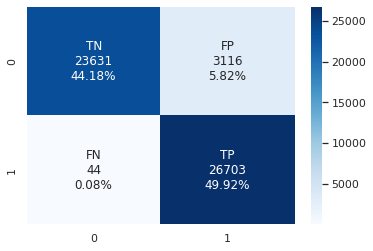

In [138]:
#Train:
train_eval(clf_knn, X_train_sm, y_train_sm, 'K-Nearest Neighbours', 'smote')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.89      0.65      0.75     13175
           1       0.12      0.37      0.19      1745

    accuracy                           0.62     14920
   macro avg       0.51      0.51      0.47     14920
weighted avg       0.80      0.62      0.68     14920
 

AUC-ROC
0.5167357426749237 

Confusion Matrix


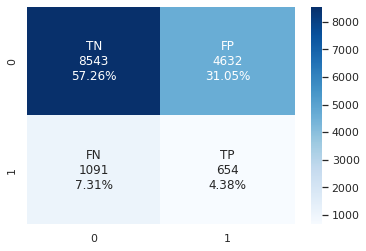

In [139]:
#Test:
test_eval(clf_knn, X_test, y_test, 'K-Nearest Neighbours', 'smote')

In [140]:
y_pred = clf_knn.predict(X_train_sm)
Accuracy_Train =  accuracy_score(y_train_sm, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_knn.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.9409279545369574
Accuracy_Test 0.8277479892761395


### Model-5: Decision Tree - SMOTE Resampling

In [141]:
clf_DT.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=21, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     26747
           1       0.91      0.92      0.91     26747

    accuracy                           0.91     53494
   macro avg       0.91      0.91      0.91     53494
weighted avg       0.91      0.91      0.91     53494
 

AUC-ROC
0.9750719430814457 

Confusion Matrix


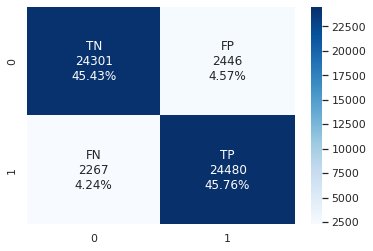

In [142]:
#Train:

train_eval(clf_DT, X_train_sm, y_train_sm, 'Decision Tree', 'smote')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     13175
           1       0.41      0.61      0.49      1745

    accuracy                           0.85     14920
   macro avg       0.68      0.75      0.70     14920
weighted avg       0.88      0.85      0.86     14920
 

AUC-ROC
0.8439147034356768 

Confusion Matrix


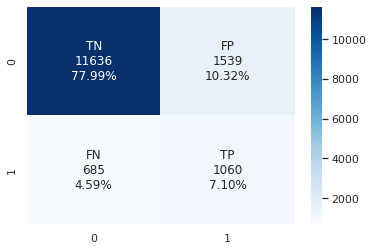

In [144]:
#Test:
test_eval(clf_DT, X_test_sc, y_test, 'Decision Tree', 'smote')

In [146]:
y_pred = clf_DT.predict(X_train_sm)
Accuracy_Train =  accuracy_score(y_train_sm, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_DT.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)

Accuracy_Train 0.9118966613078102
Accuracy_Test 0.8509383378016085


### Model-6: Random Forest - SMOTE Resampling

In [147]:
clf_RF.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Classification Report for Train dataset
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     26747
           1       0.94      0.97      0.96     26747

    accuracy                           0.95     53494
   macro avg       0.95      0.95      0.95     53494
weighted avg       0.95      0.95      0.95     53494
 

AUC-ROC
0.9939063897708457 

Confusion Matrix


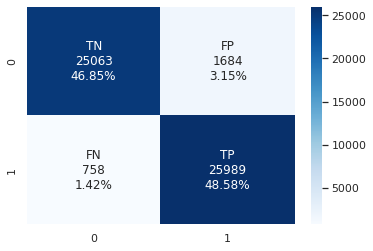

In [148]:
#Train:
train_eval(clf_RF, X_train_sm, y_train_sm, 'Random Forest', 'smote')

Classification Report for Test dataset
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     13175
           1       0.50      0.69      0.58      1745

    accuracy                           0.88     14920
   macro avg       0.73      0.80      0.76     14920
weighted avg       0.90      0.88      0.89     14920
 

AUC-ROC
0.9214144614866004 

Confusion Matrix


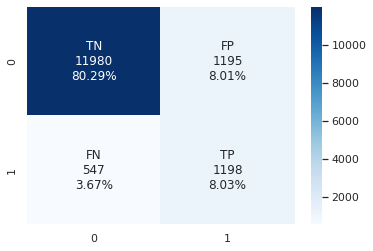

In [149]:
#Test:
test_eval(clf_RF, X_test_sc, y_test, 'Random Forest', 'smote')

In [151]:
y_pred = clf_RF.predict(X_train_sm)
Accuracy_Train =  accuracy_score(y_train_sm, y_pred)
print ('Accuracy_Train', Accuracy_Train)

y_pred = clf_RF.predict(X_test_sc)
Accuracy_Test =  accuracy_score(y_test, y_pred)
print ('Accuracy_Test', Accuracy_Test)


Accuracy_Train 0.9543500205630538
Accuracy_Test 0.8832439678284182


### Model Comparision for balanced data

In [152]:
clf_eval_df2 = pd.DataFrame({'Model':model,
                            'Dataset':dataset,
                            'Resample':resample,
                            'Precision':precision,
                            'Recall':recall,
                            'f1-score':F1score,
                            'Accuracy':Accuracy,
                            'AUC-ROC':AUCROC})

In [153]:
cm = sns.light_palette("green", as_cmap = True)
s = clf_eval_df2.style.background_gradient(cmap=cm)
s

,Model,Dataset,Resample,Precision,Recall,f1-score,Accuracy,AUC-ROC
0,Logistic Regression,train,smote,0.842885,0.868284,0.855396,0.853217,0.919707
1,Logistic Regression,test,smote,0.395099,0.822350,0.533755,0.831971,0.907899
2,Naive Bayes,train,smote,0.847878,0.421356,0.562951,0.672879,0.819928
3,Naive Bayes,test,smote,0.439403,0.421777,0.430409,0.869437,0.808243
4,Stochastic Gradient Descent,train,smote,0.832158,0.877893,0.854414,0.850413,0.914463
5,Stochastic Gradient Descent,test,smote,0.381211,0.844126,0.525227,0.821515,0.903899
6,K-Nearest Neighbours,train,smote,0.895503,0.998355,0.944136,0.940928,0.997251
7,K-Nearest Neighbours,test,smote,0.123723,0.374785,0.186033,0.616421,0.516736
8,Decision Tree,train,smote,0.909158,0.915243,0.912190,0.911897,0.975072
9,Decision Tree,test,smote,0.407849,0.607450,0.488029,0.850938,0.843915
